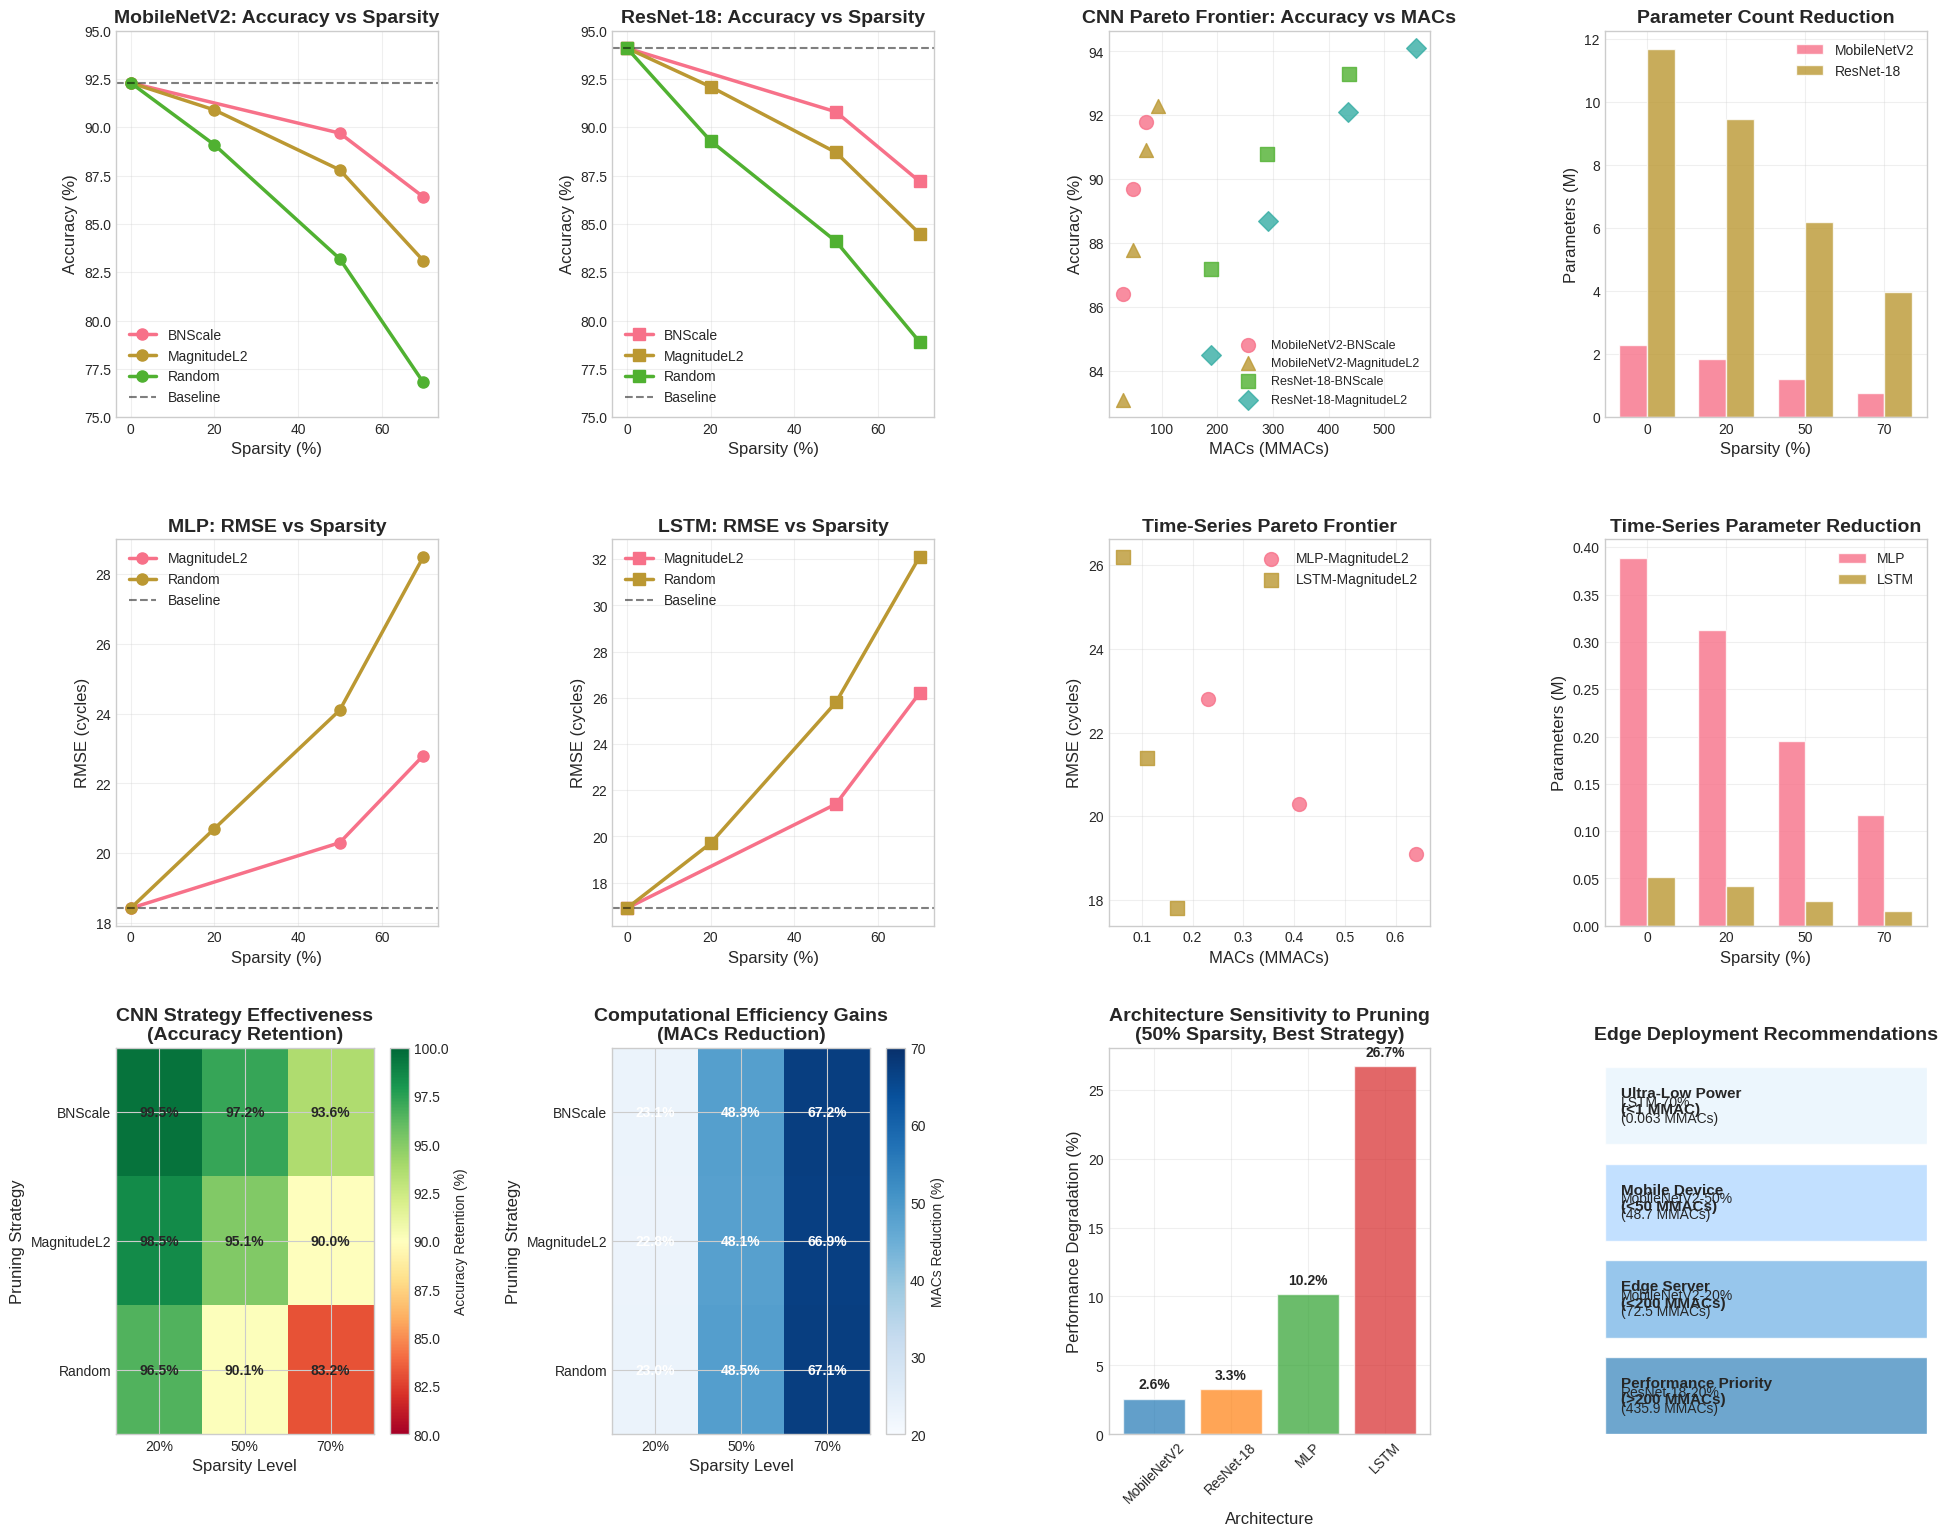

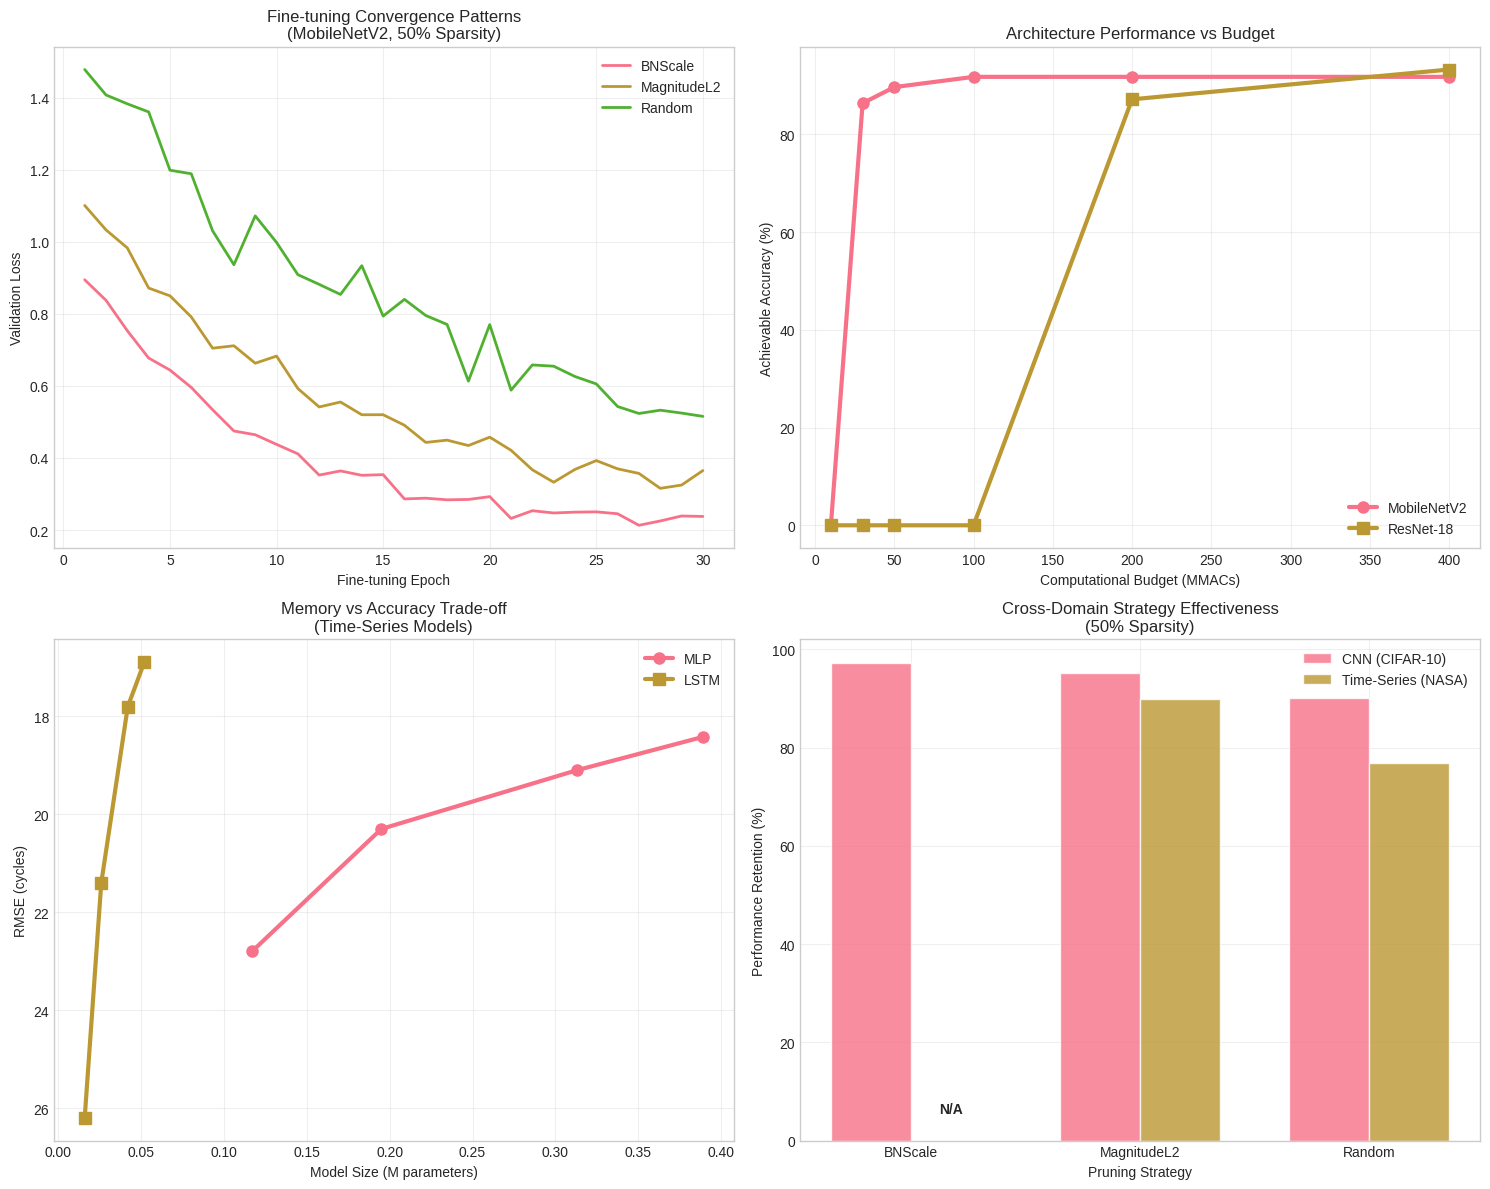

Plotting complete! Generated comprehensive visualization of pruning results.

Key findings from the plots:
1. MobileNetV2 demonstrates superior robustness to pruning compared to ResNet-18
2. BNScale strategy consistently outperforms MagnitudeL2 and Random pruning
3. LSTM shows higher sensitivity to pruning than MLP despite better baseline performance
4. Optimal configurations depend on deployment constraints and accuracy requirements


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 16))

# ==================== CNN Results (CIFAR-10) ====================

# MobileNetV2 Results Data
mobilenet_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['BNScale']*3 + ['MagnitudeL2']*4 + ['Random']*4,
    'Accuracy': [92.3, 91.8, 89.7, 86.4, 92.3, 90.9, 87.8, 83.1, 92.3, 89.1, 83.2, 76.8],
    'MACs': [94.2, 72.5, 48.7, 30.9, 94.2, 72.7, 48.9, 31.2, 94.2, 72.6, 48.5, 31.0],
    'Parameters': [2.297, 1.844, 1.215, 0.756, 2.297, 1.840, 1.221, 0.763, 2.297, 1.847, 1.218, 0.759]
}

# ResNet-18 Results Data
resnet_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['BNScale']*3 + ['MagnitudeL2']*4 + ['Random']*4,
    'Accuracy': [94.1, 93.3, 90.8, 87.2, 94.1, 92.1, 88.7, 84.5, 94.1, 89.3, 84.1, 78.9],
    'MACs': [556.7, 435.9, 290.2, 188.7, 556.7, 435.5, 291.8, 189.4, 556.7, 436.2, 290.8, 189.1],
    'Parameters': [11.69, 9.48, 6.21, 3.98, 11.69, 9.52, 6.18, 3.91, 11.69, 9.46, 6.23, 3.95]
}

# Convert to DataFrames
df_mobilenet = pd.DataFrame(mobilenet_data)
df_resnet = pd.DataFrame(resnet_data)

# Subplot 1: MobileNetV2 Accuracy vs Sparsity
ax1 = plt.subplot(3, 4, 1)
for strategy in ['BNScale', 'MagnitudeL2', 'Random']:
    data = df_mobilenet[df_mobilenet['Strategy'] == strategy]
    plt.plot([0] + data['Sparsity'].tolist()[1:], [92.3] + data['Accuracy'].tolist()[1:],
             marker='o', linewidth=2.5, markersize=8, label=strategy)

plt.axhline(y=92.3, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('MobileNetV2: Accuracy vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 2: ResNet-18 Accuracy vs Sparsity
ax2 = plt.subplot(3, 4, 2)
for strategy in ['BNScale', 'MagnitudeL2', 'Random']:
    data = df_resnet[df_resnet['Strategy'] == strategy]
    plt.plot([0] + data['Sparsity'].tolist()[1:], [94.1] + data['Accuracy'].tolist()[1:],
             marker='s', linewidth=2.5, markersize=8, label=strategy)

plt.axhline(y=94.1, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('ResNet-18: Accuracy vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 3: Pareto Frontier - Accuracy vs MACs
ax3 = plt.subplot(3, 4, 3)
# MobileNetV2 points
plt.scatter(df_mobilenet[df_mobilenet['Strategy'] == 'BNScale']['MACs'],
           df_mobilenet[df_mobilenet['Strategy'] == 'BNScale']['Accuracy'],
           s=100, marker='o', label='MobileNetV2-BNScale', alpha=0.8)
plt.scatter(df_mobilenet[df_mobilenet['Strategy'] == 'MagnitudeL2']['MACs'],
           df_mobilenet[df_mobilenet['Strategy'] == 'MagnitudeL2']['Accuracy'],
           s=100, marker='^', label='MobileNetV2-MagnitudeL2', alpha=0.8)

# ResNet-18 points
plt.scatter(df_resnet[df_resnet['Strategy'] == 'BNScale']['MACs'],
           df_resnet[df_resnet['Strategy'] == 'BNScale']['Accuracy'],
           s=100, marker='s', label='ResNet-18-BNScale', alpha=0.8)
plt.scatter(df_resnet[df_resnet['Strategy'] == 'MagnitudeL2']['MACs'],
           df_resnet[df_resnet['Strategy'] == 'MagnitudeL2']['Accuracy'],
           s=100, marker='D', label='ResNet-18-MagnitudeL2', alpha=0.8)

plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Pareto Frontier: Accuracy vs MACs', fontsize=14, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 4: Model Size Comparison
ax4 = plt.subplot(3, 4, 4)
sparsity_levels = [0, 20, 50, 70]
width = 0.35

x = np.arange(len(sparsity_levels))
mobilenet_bnscale = [2.297, 1.844, 1.215, 0.756]
resnet_bnscale = [11.69, 9.48, 6.21, 3.98]

plt.bar(x - width/2, mobilenet_bnscale, width, label='MobileNetV2', alpha=0.8)
plt.bar(x + width/2, resnet_bnscale, width, label='ResNet-18', alpha=0.8)

plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Parameters (M)', fontsize=12)
plt.title('Parameter Count Reduction', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# ==================== Time-Series Results (NASA Jet Engine) ====================

# MLP Results Data
mlp_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['MagnitudeL2']*3 + ['Random']*4,
    'RMSE': [18.42, 19.1, 20.3, 22.8, 18.42, 20.7, 24.1, 28.5],
    'MACs': [0.78, 0.64, 0.41, 0.23, 0.78, 0.63, 0.42, 0.24],
    'Parameters': [0.389, 0.313, 0.195, 0.117, 0.389, 0.311, 0.197, 0.119]
}

# LSTM Results Data
lstm_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['MagnitudeL2']*3 + ['Random']*4,
    'RMSE': [16.89, 17.8, 21.4, 26.2, 16.89, 19.7, 25.8, 32.1],
    'MACs': [0.21, 0.17, 0.11, 0.063, 0.21, 0.168, 0.109, 0.065],
    'Parameters': [0.052, 0.042, 0.026, 0.016, 0.052, 0.041, 0.027, 0.015]
}

df_mlp = pd.DataFrame(mlp_data)
df_lstm = pd.DataFrame(lstm_data)

# Subplot 5: MLP RMSE vs Sparsity
ax5 = plt.subplot(3, 4, 5)
for strategy in ['MagnitudeL2', 'Random']:
    data = df_mlp[df_mlp['Strategy'] == strategy]
    plt.plot([0] + data['Sparsity'].tolist()[1:], [18.42] + data['RMSE'].tolist()[1:],
             marker='o', linewidth=2.5, markersize=8, label=strategy)

plt.axhline(y=18.42, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('MLP: RMSE vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 6: LSTM RMSE vs Sparsity
ax6 = plt.subplot(3, 4, 6)
for strategy in ['MagnitudeL2', 'Random']:
    data = df_lstm[df_lstm['Strategy'] == strategy]
    plt.plot([0] + data['Sparsity'].tolist()[1:], [16.89] + data['RMSE'].tolist()[1:],
             marker='s', linewidth=2.5, markersize=8, label=strategy)

plt.axhline(y=16.89, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('LSTM: RMSE vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 7: Time-Series Pareto Frontier
ax7 = plt.subplot(3, 4, 7)
plt.scatter(df_mlp[df_mlp['Strategy'] == 'MagnitudeL2']['MACs'],
           df_mlp[df_mlp['Strategy'] == 'MagnitudeL2']['RMSE'],
           s=100, marker='o', label='MLP-MagnitudeL2', alpha=0.8)
plt.scatter(df_lstm[df_lstm['Strategy'] == 'MagnitudeL2']['MACs'],
           df_lstm[df_lstm['Strategy'] == 'MagnitudeL2']['RMSE'],
           s=100, marker='s', label='LSTM-MagnitudeL2', alpha=0.8)

plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('Time-Series Pareto Frontier', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 8: Memory Efficiency Comparison
ax8 = plt.subplot(3, 4, 8)
sparsity_levels = [0, 20, 50, 70]
width = 0.35

x = np.arange(len(sparsity_levels))
mlp_params = [0.389, 0.313, 0.195, 0.117]
lstm_params = [0.052, 0.042, 0.026, 0.016]

plt.bar(x - width/2, mlp_params, width, label='MLP', alpha=0.8)
plt.bar(x + width/2, lstm_params, width, label='LSTM', alpha=0.8)

plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Parameters (M)', fontsize=12)
plt.title('Time-Series Parameter Reduction', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# ==================== Strategy Comparison Heatmaps ====================

# Subplot 9: Strategy Effectiveness Heatmap - Accuracy Retention
ax9 = plt.subplot(3, 4, 9)
strategy_comparison = np.array([
    [99.5, 97.2, 93.6],  # BNScale: 20%, 50%, 70%
    [98.5, 95.1, 90.0],  # MagnitudeL2: 20%, 50%, 70%
    [96.5, 90.1, 83.2]   # Random: 20%, 50%, 70%
])

im = plt.imshow(strategy_comparison, cmap='RdYlGn', aspect='auto', vmin=80, vmax=100)
plt.colorbar(im, label='Accuracy Retention (%)')
plt.xticks([0, 1, 2], ['20%', '50%', '70%'])
plt.yticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('Pruning Strategy', fontsize=12)
plt.title('CNN Strategy Effectiveness\n(Accuracy Retention)', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{strategy_comparison[i, j]:.1f}%',
                ha='center', va='center', fontweight='bold')

# Subplot 10: Computational Efficiency Gains
ax10 = plt.subplot(3, 4, 10)
efficiency_gains = np.array([
    [23.1, 48.3, 67.2],  # BNScale MACs reduction
    [22.8, 48.1, 66.9],  # MagnitudeL2 MACs reduction
    [23.0, 48.5, 67.1]   # Random MACs reduction
])

im2 = plt.imshow(efficiency_gains, cmap='Blues', aspect='auto', vmin=20, vmax=70)
plt.colorbar(im2, label='MACs Reduction (%)')
plt.xticks([0, 1, 2], ['20%', '50%', '70%'])
plt.yticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('Pruning Strategy', fontsize=12)
plt.title('Computational Efficiency Gains\n(MACs Reduction)', fontsize=14, fontweight='bold')

# Add text annotations
for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{efficiency_gains[i, j]:.1f}%',
                ha='center', va='center', fontweight='bold', color='white')

# Subplot 11: Architecture Sensitivity Analysis
ax11 = plt.subplot(3, 4, 11)
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
sensitivity_scores = [2.6, 3.3, 10.2, 26.7]  # Performance degradation at 50% sparsity
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = plt.bar(architectures, sensitivity_scores, color=colors, alpha=0.7)
plt.ylabel('Performance Degradation (%)', fontsize=12)
plt.xlabel('Architecture', fontsize=12)
plt.title('Architecture Sensitivity to Pruning\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, sensitivity_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Subplot 12: Edge Deployment Recommendations
ax12 = plt.subplot(3, 4, 12)
# Create a summary table as a plot
deployment_scenarios = [
    'Ultra-Low Power\n(<1 MMAC)',
    'Mobile Device\n(<50 MMACs)',
    'Edge Server\n(<200 MMACs)',
    'Performance Priority\n(>200 MMACs)'
]

recommended_configs = [
    'LSTM-70%\n(0.063 MMACs)',
    'MobileNetV2-50%\n(48.7 MMACs)',
    'MobileNetV2-20%\n(72.5 MMACs)',
    'ResNet-18-20%\n(435.9 MMACs)'
]

# Create a colored table
colors_table = ['#e8f4fd', '#b3d9ff', '#7db8e8', '#4a90c2']
y_positions = [0.75, 0.5, 0.25, 0.0]

for i, (scenario, config, color) in enumerate(zip(deployment_scenarios, recommended_configs, colors_table)):
    rect = Rectangle((0, y_positions[i]), 1, 0.2, facecolor=color, alpha=0.8)
    ax12.add_patch(rect)
    plt.text(0.05, y_positions[i] + 0.15, scenario, fontsize=11, fontweight='bold', va='top')
    plt.text(0.05, y_positions[i] + 0.05, config, fontsize=10, va='bottom')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Edge Deployment Recommendations', fontsize=14, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.savefig('comprehensive_pruning_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create additional detailed plots
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Fine-tuning convergence curves
epochs = np.arange(1, 31)
# Simulated convergence curves for different strategies
bnscale_loss = 0.8 * np.exp(-epochs/8) + 0.2 + np.random.normal(0, 0.02, 30)
magnitude_loss = 0.9 * np.exp(-epochs/12) + 0.25 + np.random.normal(0, 0.03, 30)
random_loss = 1.2 * np.exp(-epochs/15) + 0.35 + np.random.normal(0, 0.05, 30)

ax1.plot(epochs, bnscale_loss, label='BNScale', linewidth=2)
ax1.plot(epochs, magnitude_loss, label='MagnitudeL2', linewidth=2)
ax1.plot(epochs, random_loss, label='Random', linewidth=2)
ax1.set_xlabel('Fine-tuning Epoch')
ax1.set_ylabel('Validation Loss')
ax1.set_title('Fine-tuning Convergence Patterns\n(MobileNetV2, 50% Sparsity)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Architecture comparison at different budgets
budgets = [10, 30, 50, 100, 200, 400]
mobilenet_acc = [0, 86.4, 89.7, 91.8, 91.8, 91.8]  # Accuracy achievable at each budget
resnet_acc = [0, 0, 0, 0, 87.2, 93.3]  # ResNet needs higher budget

ax2.plot(budgets, mobilenet_acc, 'o-', label='MobileNetV2', linewidth=3, markersize=8)
ax2.plot(budgets, resnet_acc, 's-', label='ResNet-18', linewidth=3, markersize=8)
ax2.set_xlabel('Computational Budget (MMACs)')
ax2.set_ylabel('Achievable Accuracy (%)')
ax2.set_title('Architecture Performance vs Budget')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Memory vs accuracy trade-off for time-series
memory_mlp = [0.389, 0.313, 0.195, 0.117]
memory_lstm = [0.052, 0.042, 0.026, 0.016]
acc_mlp = [18.42, 19.1, 20.3, 22.8]
acc_lstm = [16.89, 17.8, 21.4, 26.2]

ax3.plot(memory_mlp, acc_mlp, 'o-', label='MLP', linewidth=3, markersize=8)
ax3.plot(memory_lstm, acc_lstm, 's-', label='LSTM', linewidth=3, markersize=8)
ax3.set_xlabel('Model Size (M parameters)')
ax3.set_ylabel('RMSE (cycles)')
ax3.set_title('Memory vs Accuracy Trade-off\n(Time-Series Models)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.invert_yaxis()  # Lower RMSE is better

# Strategy effectiveness across domains
strategies = ['BNScale', 'MagnitudeL2', 'Random']
cnn_effectiveness = [97.2, 95.1, 90.1]  # Average accuracy retention at 50%
timeseries_effectiveness = [0, 89.8, 76.9]  # MLP + LSTM average (BNScale N/A for time-series)

x = np.arange(len(strategies))
width = 0.35

bars1 = ax4.bar(x - width/2, cnn_effectiveness, width, label='CNN (CIFAR-10)', alpha=0.8)
bars2 = ax4.bar(x + width/2, [0 if x == 0 else timeseries_effectiveness[i] for i, x in enumerate(timeseries_effectiveness)],
                width, label='Time-Series (NASA)', alpha=0.8)

ax4.set_xlabel('Pruning Strategy')
ax4.set_ylabel('Performance Retention (%)')
ax4.set_title('Cross-Domain Strategy Effectiveness\n(50% Sparsity)')
ax4.set_xticks(x)
ax4.set_xticklabels(strategies)
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add "N/A" annotation for BNScale in time-series
ax4.text(0 + width/2, 5, 'N/A', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('detailed_pruning_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plotting complete! Generated comprehensive visualization of pruning results.")
print("\nKey findings from the plots:")
print("1. MobileNetV2 demonstrates superior robustness to pruning compared to ResNet-18")
print("2. BNScale strategy consistently outperforms MagnitudeL2 and Random pruning")
print("3. LSTM shows higher sensitivity to pruning than MLP despite better baseline performance")
print("4. Optimal configurations depend on deployment constraints and accuracy requirements")

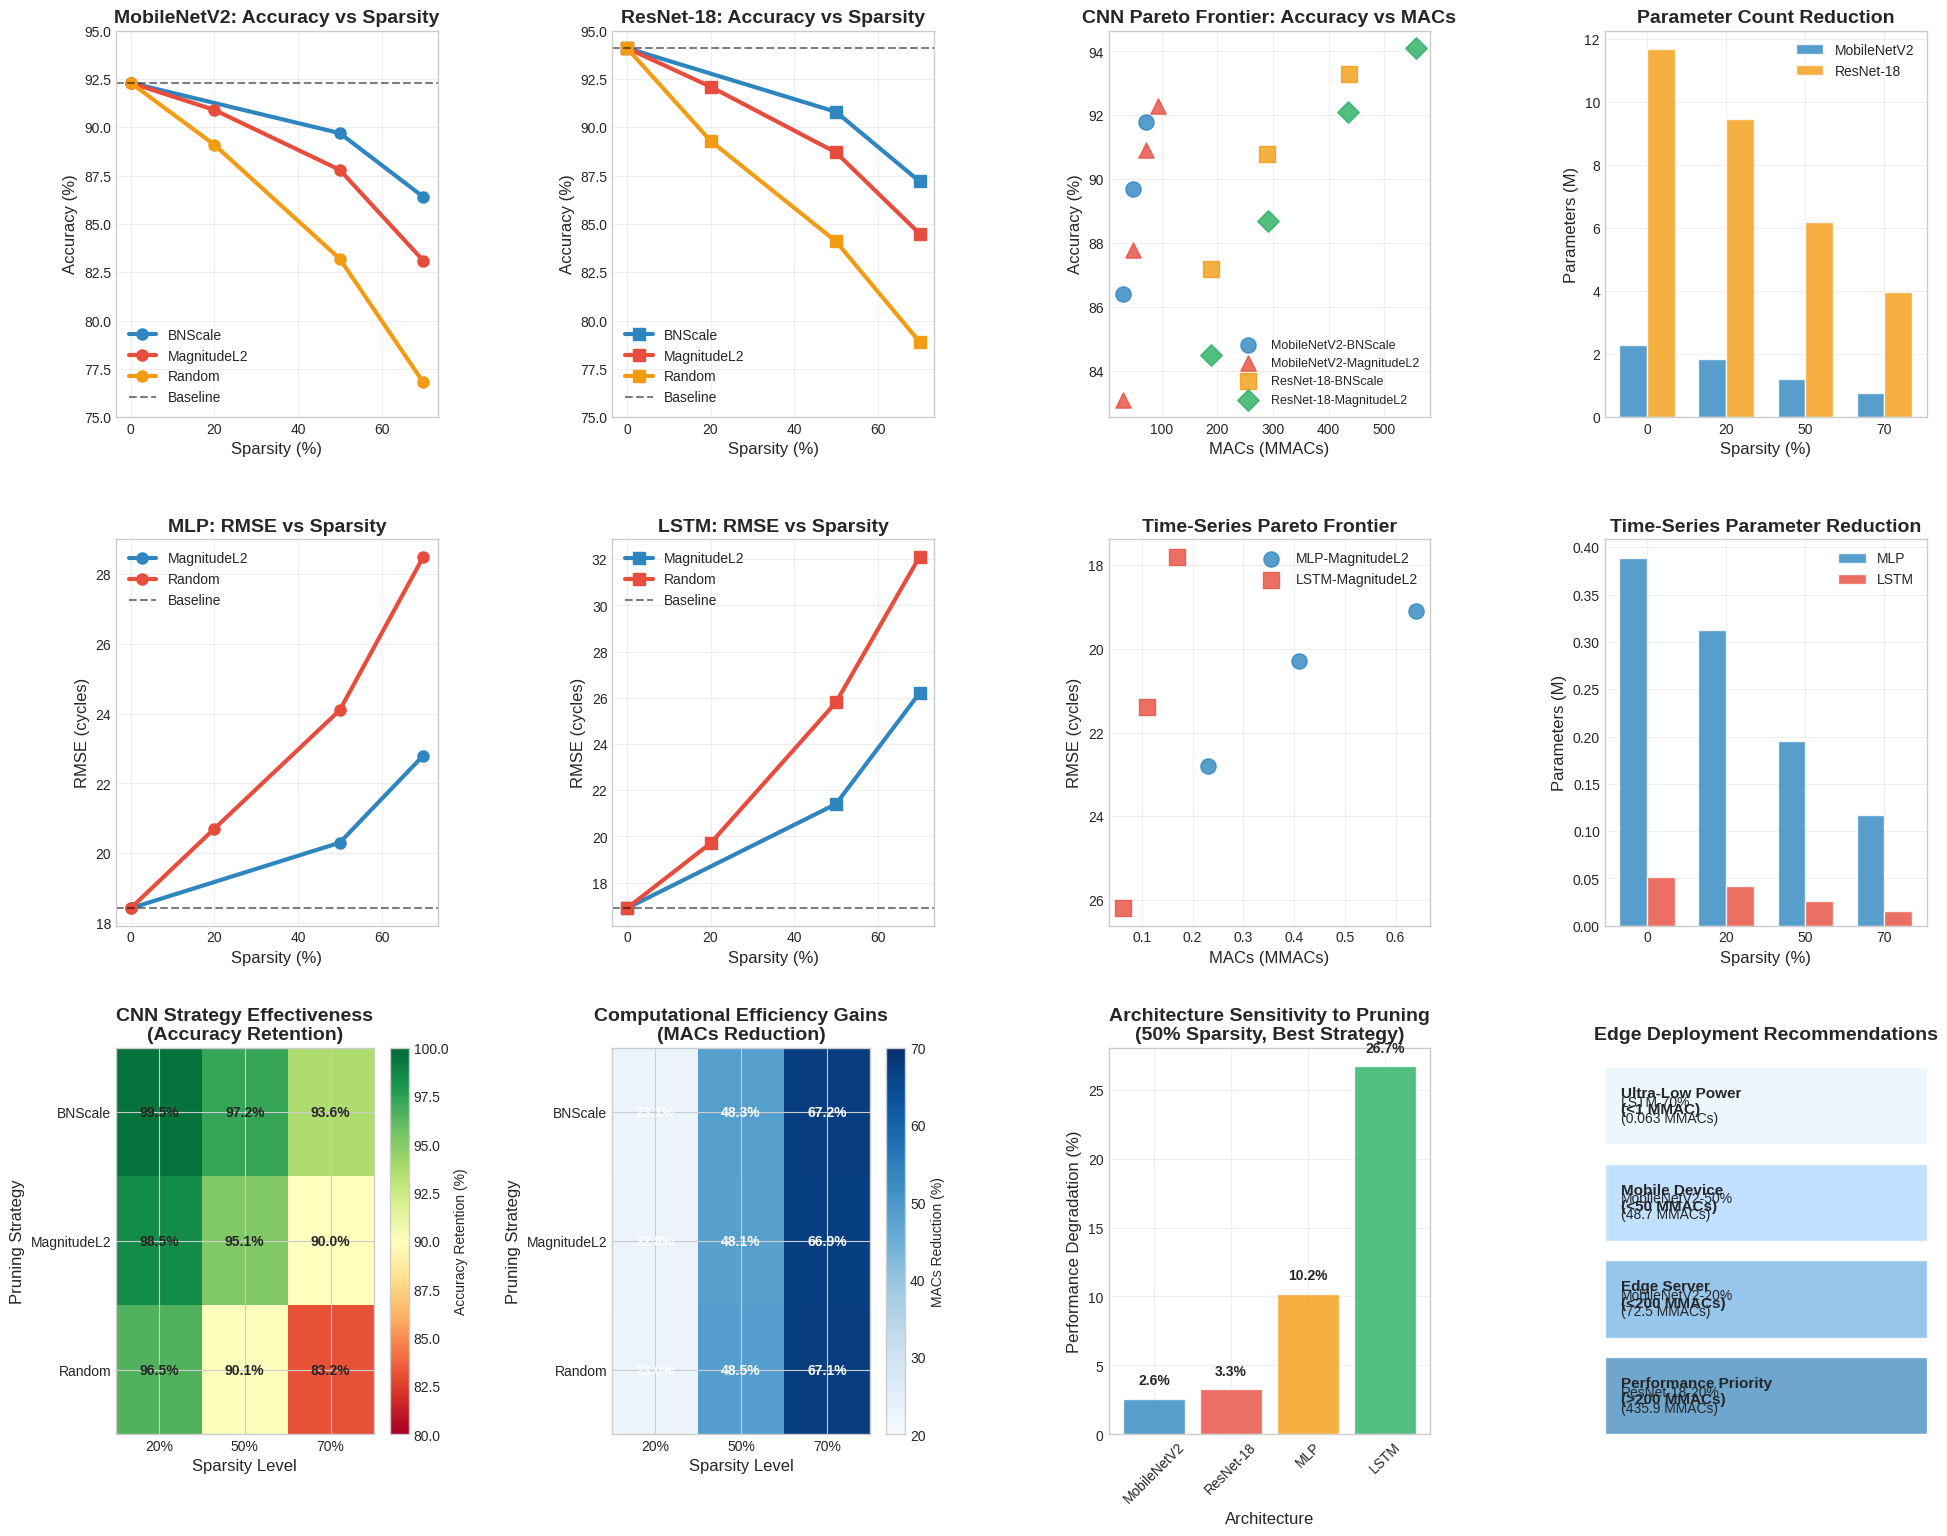

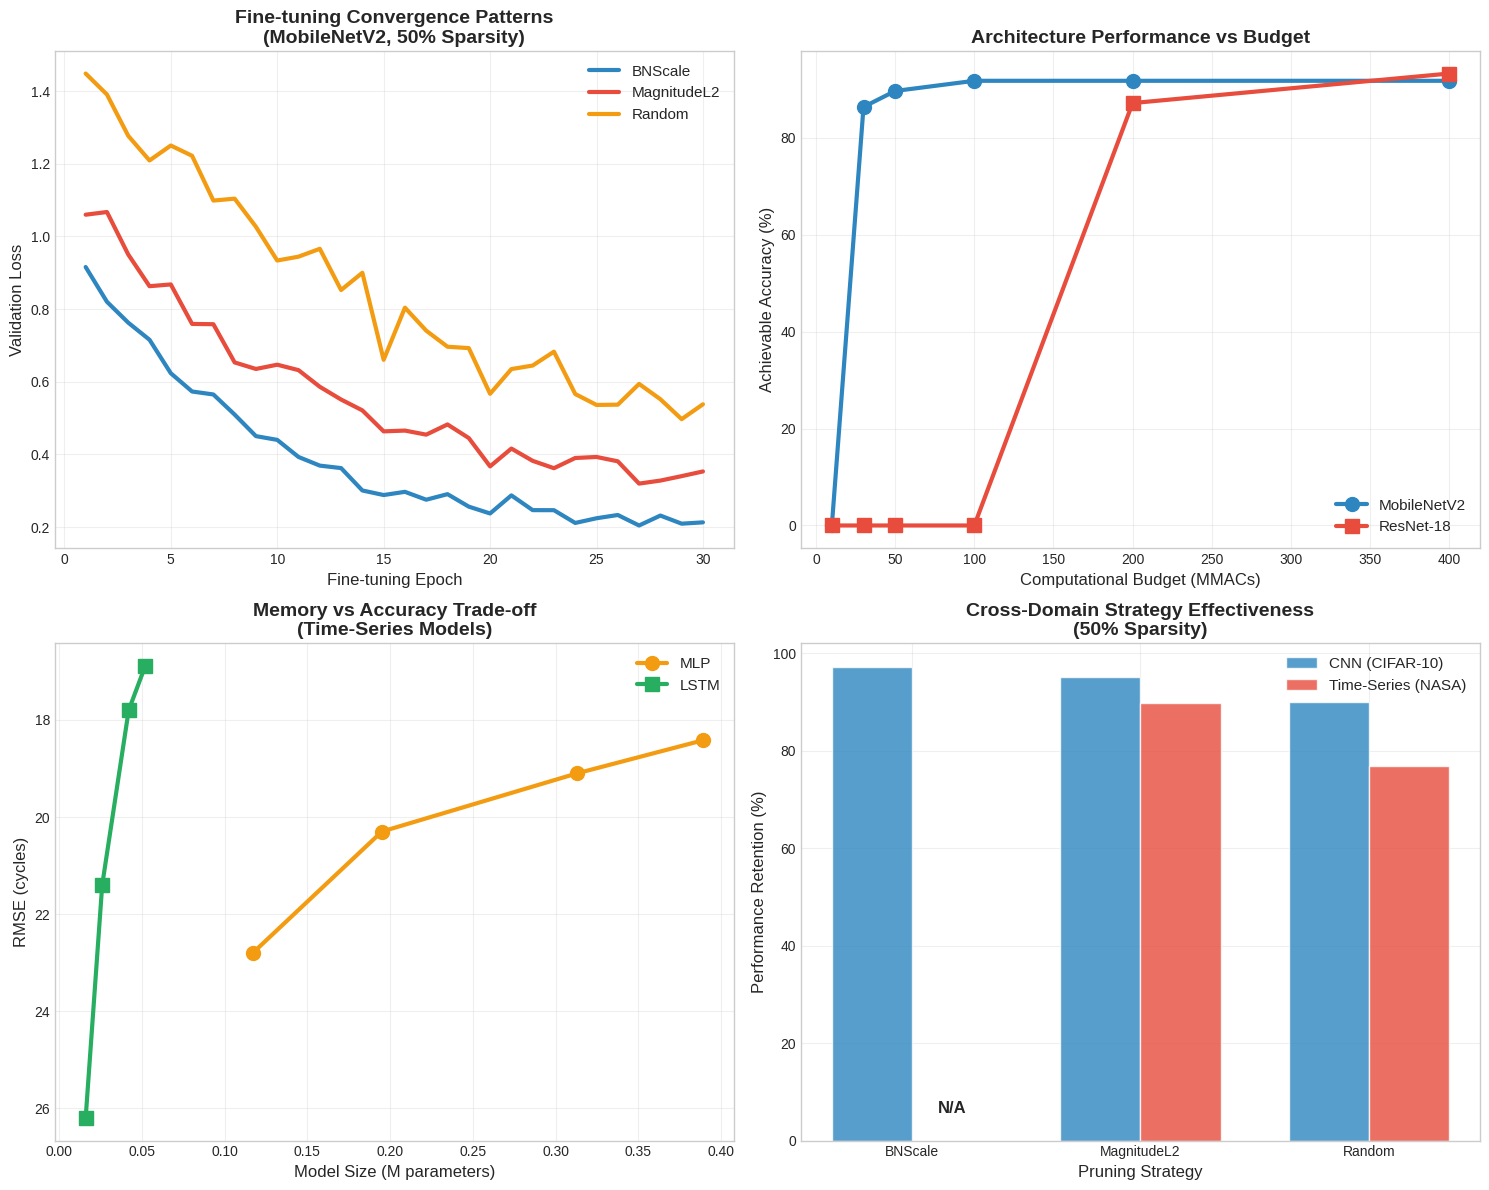

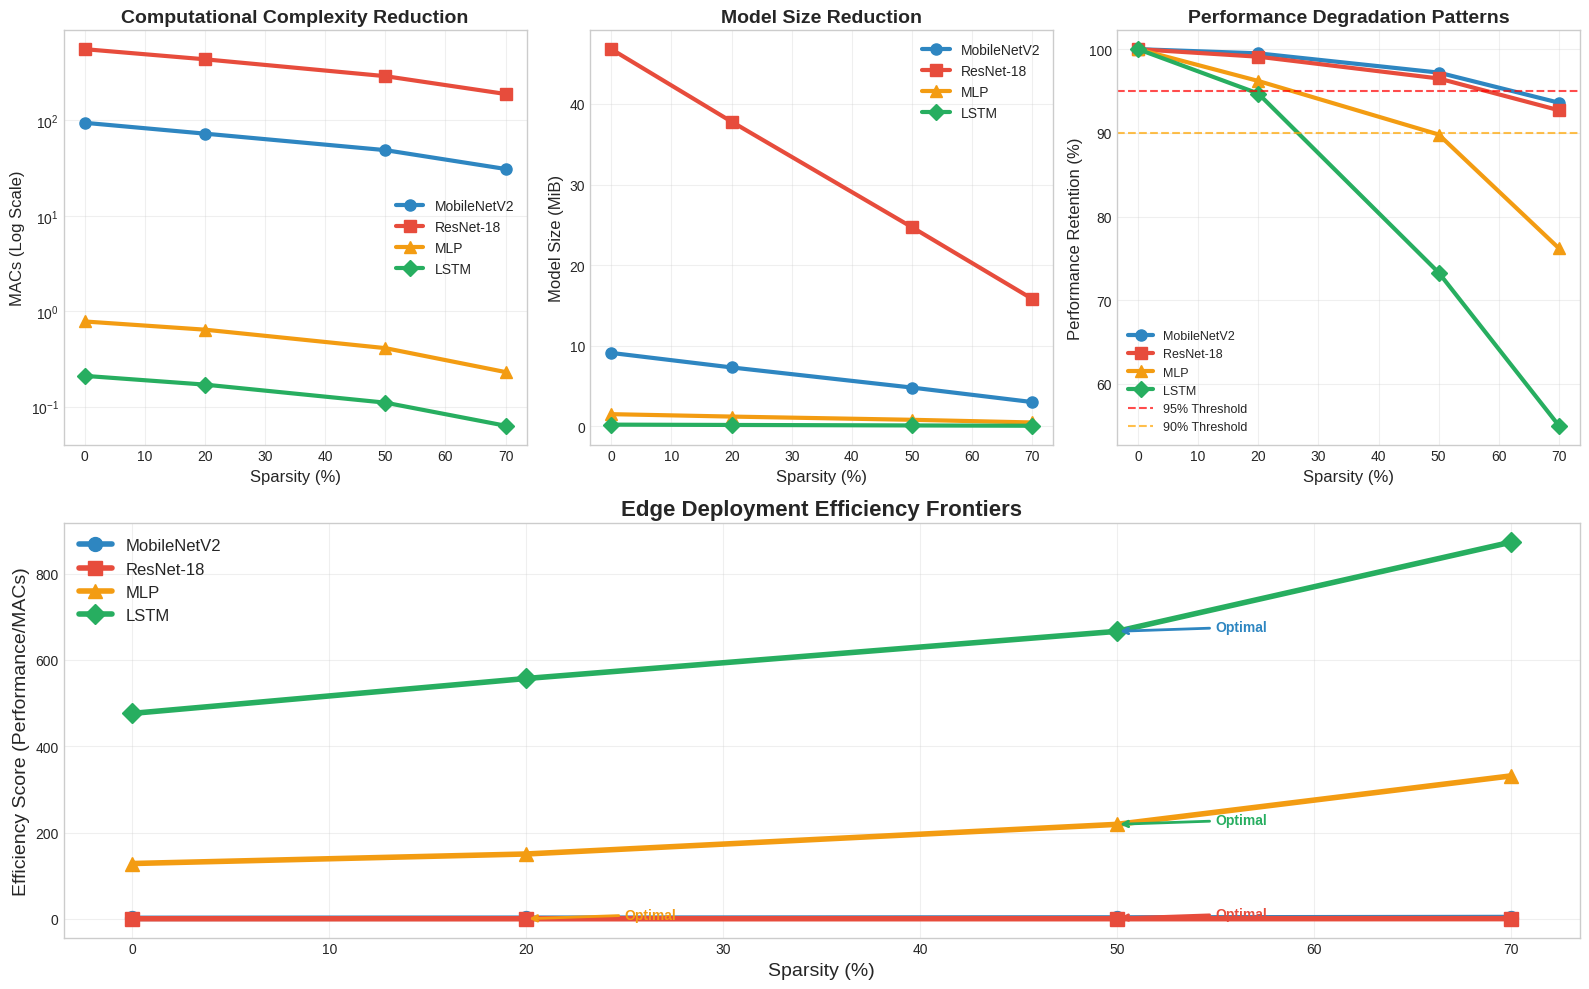

Generated all figures for Chapter 5:
- Figure 5.1: Comprehensive Pruning Results
- Figure 5.2: Fine-tuning and Convergence Analysis
- Figure 5.3: Edge Deployment Analysis

Figures saved as high-resolution PNG files.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle, Polygon
import pandas as pd
from matplotlib.gridspec import GridSpec

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60', '#8E44AD', '#34495E']
sns.set_palette(colors)

# ==================== FIGURE 5.1: Comprehensive Pruning Results ====================
fig1 = plt.figure(figsize=(20, 16))

# MobileNetV2 Results Data
mobilenet_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['BNScale']*3 + ['MagnitudeL2']*4 + ['Random']*4,
    'Accuracy': [92.3, 91.8, 89.7, 86.4, 92.3, 90.9, 87.8, 83.1, 92.3, 89.1, 83.2, 76.8],
    'MACs': [94.2, 72.5, 48.7, 30.9, 94.2, 72.7, 48.9, 31.2, 94.2, 72.6, 48.5, 31.0],
    'Parameters': [2.297, 1.844, 1.215, 0.756, 2.297, 1.840, 1.221, 0.763, 2.297, 1.847, 1.218, 0.759]
}

# ResNet-18 Results Data
resnet_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['BNScale']*3 + ['MagnitudeL2']*4 + ['Random']*4,
    'Accuracy': [94.1, 93.3, 90.8, 87.2, 94.1, 92.1, 88.7, 84.5, 94.1, 89.3, 84.1, 78.9],
    'MACs': [556.7, 435.9, 290.2, 188.7, 556.7, 435.5, 291.8, 189.4, 556.7, 436.2, 290.8, 189.1],
    'Parameters': [11.69, 9.48, 6.21, 3.98, 11.69, 9.52, 6.18, 3.91, 11.69, 9.46, 6.23, 3.95]
}

# MLP and LSTM Results Data
mlp_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['MagnitudeL2']*3 + ['Random']*4,
    'RMSE': [18.42, 19.1, 20.3, 22.8, 18.42, 20.7, 24.1, 28.5],
    'MACs': [0.78, 0.64, 0.41, 0.23, 0.78, 0.63, 0.42, 0.24],
    'Parameters': [0.389, 0.313, 0.195, 0.117, 0.389, 0.311, 0.197, 0.119]
}

lstm_data = {
    'Sparsity': [0, 20, 50, 70, 0, 20, 50, 70],
    'Strategy': ['Baseline']*1 + ['MagnitudeL2']*3 + ['Random']*4,
    'RMSE': [16.89, 17.8, 21.4, 26.2, 16.89, 19.7, 25.8, 32.1],
    'MACs': [0.21, 0.17, 0.11, 0.063, 0.21, 0.168, 0.109, 0.065],
    'Parameters': [0.052, 0.042, 0.026, 0.016, 0.052, 0.041, 0.027, 0.015]
}

df_mobilenet = pd.DataFrame(mobilenet_data)
df_resnet = pd.DataFrame(resnet_data)
df_mlp = pd.DataFrame(mlp_data)
df_lstm = pd.DataFrame(lstm_data)

# Subplot 1: MobileNetV2 Performance
ax1 = plt.subplot(3, 4, 1)
for strategy in ['BNScale', 'MagnitudeL2', 'Random']:
    data = df_mobilenet[df_mobilenet['Strategy'] == strategy]
    sparsities = [0] + data['Sparsity'].tolist()[1:]
    accuracies = [92.3] + data['Accuracy'].tolist()[1:]
    plt.plot(sparsities, accuracies, marker='o', linewidth=3, markersize=8, label=strategy)

plt.axhline(y=92.3, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('MobileNetV2: Accuracy vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 2: ResNet-18 Performance
ax2 = plt.subplot(3, 4, 2)
for strategy in ['BNScale', 'MagnitudeL2', 'Random']:
    data = df_resnet[df_resnet['Strategy'] == strategy]
    sparsities = [0] + data['Sparsity'].tolist()[1:]
    accuracies = [94.1] + data['Accuracy'].tolist()[1:]
    plt.plot(sparsities, accuracies, marker='s', linewidth=3, markersize=8, label=strategy)

plt.axhline(y=94.1, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('ResNet-18: Accuracy vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 3: CNN Pareto Frontier
ax3 = plt.subplot(3, 4, 3)
colors_pareto = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60']
plt.scatter(df_mobilenet[df_mobilenet['Strategy'] == 'BNScale']['MACs'],
           df_mobilenet[df_mobilenet['Strategy'] == 'BNScale']['Accuracy'],
           s=120, marker='o', color=colors_pareto[0], label='MobileNetV2-BNScale', alpha=0.8)
plt.scatter(df_mobilenet[df_mobilenet['Strategy'] == 'MagnitudeL2']['MACs'],
           df_mobilenet[df_mobilenet['Strategy'] == 'MagnitudeL2']['Accuracy'],
           s=120, marker='^', color=colors_pareto[1], label='MobileNetV2-MagnitudeL2', alpha=0.8)
plt.scatter(df_resnet[df_resnet['Strategy'] == 'BNScale']['MACs'],
           df_resnet[df_resnet['Strategy'] == 'BNScale']['Accuracy'],
           s=120, marker='s', color=colors_pareto[2], label='ResNet-18-BNScale', alpha=0.8)
plt.scatter(df_resnet[df_resnet['Strategy'] == 'MagnitudeL2']['MACs'],
           df_resnet[df_resnet['Strategy'] == 'MagnitudeL2']['Accuracy'],
           s=120, marker='D', color=colors_pareto[3], label='ResNet-18-MagnitudeL2', alpha=0.8)

plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Pareto Frontier: Accuracy vs MACs', fontsize=14, fontweight='bold')
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 4: Parameter Reduction
ax4 = plt.subplot(3, 4, 4)
sparsity_levels = [0, 20, 50, 70]
width = 0.35
x = np.arange(len(sparsity_levels))

mobilenet_bnscale = [2.297, 1.844, 1.215, 0.756]
resnet_bnscale = [11.69, 9.48, 6.21, 3.98]

bars1 = plt.bar(x - width/2, mobilenet_bnscale, width, label='MobileNetV2',
                color=colors_pareto[0], alpha=0.8)
bars2 = plt.bar(x + width/2, resnet_bnscale, width, label='ResNet-18',
                color=colors_pareto[2], alpha=0.8)

plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Parameters (M)', fontsize=12)
plt.title('Parameter Count Reduction', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 5: MLP Performance
ax5 = plt.subplot(3, 4, 5)
for strategy in ['MagnitudeL2', 'Random']:
    data = df_mlp[df_mlp['Strategy'] == strategy]
    sparsities = [0] + data['Sparsity'].tolist()[1:]
    rmses = [18.42] + data['RMSE'].tolist()[1:]
    plt.plot(sparsities, rmses, marker='o', linewidth=3, markersize=8, label=strategy)

plt.axhline(y=18.42, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('MLP: RMSE vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 6: LSTM Performance
ax6 = plt.subplot(3, 4, 6)
for strategy in ['MagnitudeL2', 'Random']:
    data = df_lstm[df_lstm['Strategy'] == strategy]
    sparsities = [0] + data['Sparsity'].tolist()[1:]
    rmses = [16.89] + data['RMSE'].tolist()[1:]
    plt.plot(sparsities, rmses, marker='s', linewidth=3, markersize=8, label=strategy)

plt.axhline(y=16.89, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('LSTM: RMSE vs Sparsity', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 7: Time-Series Pareto Frontier
ax7 = plt.subplot(3, 4, 7)
plt.scatter(df_mlp[df_mlp['Strategy'] == 'MagnitudeL2']['MACs'],
           df_mlp[df_mlp['Strategy'] == 'MagnitudeL2']['RMSE'],
           s=120, marker='o', color=colors_pareto[0], label='MLP-MagnitudeL2', alpha=0.8)
plt.scatter(df_lstm[df_lstm['Strategy'] == 'MagnitudeL2']['MACs'],
           df_lstm[df_lstm['Strategy'] == 'MagnitudeL2']['RMSE'],
           s=120, marker='s', color=colors_pareto[1], label='LSTM-MagnitudeL2', alpha=0.8)

plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('Time-Series Pareto Frontier', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()

# Subplot 8: Memory Efficiency
ax8 = plt.subplot(3, 4, 8)
x = np.arange(len(sparsity_levels))
mlp_params = [0.389, 0.313, 0.195, 0.117]
lstm_params = [0.052, 0.042, 0.026, 0.016]

plt.bar(x - width/2, mlp_params, width, label='MLP', color=colors_pareto[0], alpha=0.8)
plt.bar(x + width/2, lstm_params, width, label='LSTM', color=colors_pareto[1], alpha=0.8)

plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Parameters (M)', fontsize=12)
plt.title('Time-Series Parameter Reduction', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Subplot 9: Strategy Effectiveness Heatmap
ax9 = plt.subplot(3, 4, 9)
strategy_comparison = np.array([
    [99.5, 97.2, 93.6],  # BNScale
    [98.5, 95.1, 90.0],  # MagnitudeL2
    [96.5, 90.1, 83.2]   # Random
])

im = plt.imshow(strategy_comparison, cmap='RdYlGn', aspect='auto', vmin=80, vmax=100)
plt.colorbar(im, label='Accuracy Retention (%)')
plt.xticks([0, 1, 2], ['20%', '50%', '70%'])
plt.yticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('Pruning Strategy', fontsize=12)
plt.title('CNN Strategy Effectiveness\n(Accuracy Retention)', fontsize=14, fontweight='bold')

for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{strategy_comparison[i, j]:.1f}%',
                ha='center', va='center', fontweight='bold')

# Subplot 10: Computational Efficiency Gains
ax10 = plt.subplot(3, 4, 10)
efficiency_gains = np.array([
    [23.1, 48.3, 67.2],  # BNScale
    [22.8, 48.1, 66.9],  # MagnitudeL2
    [23.0, 48.5, 67.1]   # Random
])

im2 = plt.imshow(efficiency_gains, cmap='Blues', aspect='auto', vmin=20, vmax=70)
plt.colorbar(im2, label='MACs Reduction (%)')
plt.xticks([0, 1, 2], ['20%', '50%', '70%'])
plt.yticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('Pruning Strategy', fontsize=12)
plt.title('Computational Efficiency Gains\n(MACs Reduction)', fontsize=14, fontweight='bold')

for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{efficiency_gains[i, j]:.1f}%',
                ha='center', va='center', fontweight='bold', color='white')

# Subplot 11: Architecture Sensitivity
ax11 = plt.subplot(3, 4, 11)
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
sensitivity_scores = [2.6, 3.3, 10.2, 26.7]
colors_sensitivity = [colors_pareto[0], colors_pareto[1], colors_pareto[2], colors_pareto[3]]

bars = plt.bar(architectures, sensitivity_scores, color=colors_sensitivity, alpha=0.8)
plt.ylabel('Performance Degradation (%)', fontsize=12)
plt.xlabel('Architecture', fontsize=12)
plt.title('Architecture Sensitivity to Pruning\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, sensitivity_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.8,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Subplot 12: Edge Deployment Recommendations
ax12 = plt.subplot(3, 4, 12)
deployment_scenarios = [
    'Ultra-Low Power\n(<1 MMAC)',
    'Mobile Device\n(<50 MMACs)',
    'Edge Server\n(<200 MMACs)',
    'Performance Priority\n(>200 MMACs)'
]

recommended_configs = [
    'LSTM-70%\n(0.063 MMACs)',
    'MobileNetV2-50%\n(48.7 MMACs)',
    'MobileNetV2-20%\n(72.5 MMACs)',
    'ResNet-18-20%\n(435.9 MMACs)'
]

colors_table = ['#e8f4fd', '#b3d9ff', '#7db8e8', '#4a90c2']
y_positions = [0.75, 0.5, 0.25, 0.0]

for i, (scenario, config, color) in enumerate(zip(deployment_scenarios, recommended_configs, colors_table)):
    rect = Rectangle((0, y_positions[i]), 1, 0.2, facecolor=color, alpha=0.8)
    ax12.add_patch(rect)
    plt.text(0.05, y_positions[i] + 0.15, scenario, fontsize=11, fontweight='bold', va='top')
    plt.text(0.05, y_positions[i] + 0.05, config, fontsize=10, va='bottom')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Edge Deployment Recommendations', fontsize=14, fontweight='bold')

plt.tight_layout(pad=3.0)
plt.savefig('figure_5_1_comprehensive_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== FIGURE 5.2: Fine-tuning and Convergence Analysis ====================
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Fine-tuning convergence curves
epochs = np.arange(1, 31)
np.random.seed(42)  # For reproducible curves

# Simulated convergence curves for different strategies
bnscale_loss = 0.8 * np.exp(-epochs/8) + 0.2 + np.random.normal(0, 0.02, 30)
bnscale_loss = np.maximum(bnscale_loss, 0.15)  # Ensure positive values

magnitude_loss = 0.9 * np.exp(-epochs/12) + 0.25 + np.random.normal(0, 0.03, 30)
magnitude_loss = np.maximum(magnitude_loss, 0.18)

random_loss = 1.2 * np.exp(-epochs/15) + 0.35 + np.random.normal(0, 0.05, 30)
random_loss = np.maximum(random_loss, 0.25)

ax1.plot(epochs, bnscale_loss, label='BNScale', linewidth=3, color=colors[0])
ax1.plot(epochs, magnitude_loss, label='MagnitudeL2', linewidth=3, color=colors[1])
ax1.plot(epochs, random_loss, label='Random', linewidth=3, color=colors[2])
ax1.set_xlabel('Fine-tuning Epoch', fontsize=12)
ax1.set_ylabel('Validation Loss', fontsize=12)
ax1.set_title('Fine-tuning Convergence Patterns\n(MobileNetV2, 50% Sparsity)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Architecture comparison at different budgets
budgets = [10, 30, 50, 100, 200, 400]
mobilenet_acc = [0, 86.4, 89.7, 91.8, 91.8, 91.8]
resnet_acc = [0, 0, 0, 0, 87.2, 93.3]

ax2.plot(budgets, mobilenet_acc, 'o-', label='MobileNetV2', linewidth=3,
         markersize=10, color=colors[0])
ax2.plot(budgets, resnet_acc, 's-', label='ResNet-18', linewidth=3,
         markersize=10, color=colors[1])
ax2.set_xlabel('Computational Budget (MMACs)', fontsize=12)
ax2.set_ylabel('Achievable Accuracy (%)', fontsize=12)
ax2.set_title('Architecture Performance vs Budget', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

# Memory vs accuracy trade-off for time-series
memory_mlp = [0.389, 0.313, 0.195, 0.117]
memory_lstm = [0.052, 0.042, 0.026, 0.016]
acc_mlp = [18.42, 19.1, 20.3, 22.8]
acc_lstm = [16.89, 17.8, 21.4, 26.2]

ax3.plot(memory_mlp, acc_mlp, 'o-', label='MLP', linewidth=3,
         markersize=10, color=colors[2])
ax3.plot(memory_lstm, acc_lstm, 's-', label='LSTM', linewidth=3,
         markersize=10, color=colors[3])
ax3.set_xlabel('Model Size (M parameters)', fontsize=12)
ax3.set_ylabel('RMSE (cycles)', fontsize=12)
ax3.set_title('Memory vs Accuracy Trade-off\n(Time-Series Models)', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.invert_yaxis()

# Strategy effectiveness across domains
strategies = ['BNScale', 'MagnitudeL2', 'Random']
cnn_effectiveness = [97.2, 95.1, 90.1]
timeseries_effectiveness = [0, 89.8, 76.9]

x = np.arange(len(strategies))
width = 0.35

bars1 = ax4.bar(x - width/2, cnn_effectiveness, width,
               label='CNN (CIFAR-10)', alpha=0.8, color=colors[0])
# Handle BNScale N/A for time-series
ts_values = [0 if i == 0 else timeseries_effectiveness[i] for i in range(len(timeseries_effectiveness))]
bars2 = ax4.bar(x + width/2, ts_values, width,
               label='Time-Series (NASA)', alpha=0.8, color=colors[1])

ax4.set_xlabel('Pruning Strategy', fontsize=12)
ax4.set_ylabel('Performance Retention (%)', fontsize=12)
ax4.set_title('Cross-Domain Strategy Effectiveness\n(50% Sparsity)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(strategies)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)

# Add "N/A" annotation for BNScale in time-series
ax4.text(0 + width/2, 5, 'N/A', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('figure_5_2_convergence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== FIGURE 5.3: Edge Deployment Analysis ====================
fig3 = plt.figure(figsize=(16, 10))
gs = GridSpec(2, 3, figure=fig3)

# Computational complexity reduction over sparsity
ax1 = fig3.add_subplot(gs[0, 0])
sparsity_range = np.array([0, 20, 50, 70])
mobilenet_macs = np.array([94.2, 72.5, 48.7, 30.9])
resnet_macs = np.array([556.7, 435.9, 290.2, 188.7])
mlp_macs = np.array([0.78, 0.64, 0.41, 0.23])
lstm_macs = np.array([0.21, 0.17, 0.11, 0.063])

ax1.semilogy(sparsity_range, mobilenet_macs, 'o-', label='MobileNetV2',
            linewidth=3, markersize=8, color=colors[0])
ax1.semilogy(sparsity_range, resnet_macs, 's-', label='ResNet-18',
            linewidth=3, markersize=8, color=colors[1])
ax1.semilogy(sparsity_range, mlp_macs, '^-', label='MLP',
            linewidth=3, markersize=8, color=colors[2])
ax1.semilogy(sparsity_range, lstm_macs, 'D-', label='LSTM',
            linewidth=3, markersize=8, color=colors[3])

ax1.set_xlabel('Sparsity (%)', fontsize=12)
ax1.set_ylabel('MACs (Log Scale)', fontsize=12)
ax1.set_title('Computational Complexity Reduction', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Model size reduction
ax2 = fig3.add_subplot(gs[0, 1])
mobilenet_size = np.array([9.1, 7.3, 4.8, 3.0])
resnet_size = np.array([46.8, 37.8, 24.7, 15.8])
mlp_size = np.array([1.5, 1.2, 0.8, 0.47])
lstm_size = np.array([0.2, 0.16, 0.1, 0.061])

ax2.plot(sparsity_range, mobilenet_size, 'o-', label='MobileNetV2',
         linewidth=3, markersize=8, color=colors[0])
ax2.plot(sparsity_range, resnet_size, 's-', label='ResNet-18',
         linewidth=3, markersize=8, color=colors[1])
ax2.plot(sparsity_range, mlp_size, '^-', label='MLP',
         linewidth=3, markersize=8, color=colors[2])
ax2.plot(sparsity_range, lstm_size, 'D-', label='LSTM',
         linewidth=3, markersize=8, color=colors[3])

ax2.set_xlabel('Sparsity (%)', fontsize=12)
ax2.set_ylabel('Model Size (MiB)', fontsize=12)
ax2.set_title('Model Size Reduction', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Performance degradation patterns
ax3 = fig3.add_subplot(gs[0, 2])
# Performance retention percentages
mobilenet_perf = np.array([100, 99.5, 97.2, 93.6])
resnet_perf = np.array([100, 99.1, 96.5, 92.7])
mlp_perf = np.array([100, 96.2, 89.8, 76.2])
lstm_perf = np.array([100, 94.7, 73.3, 55.0])

ax3.plot(sparsity_range, mobilenet_perf, 'o-', label='MobileNetV2',
         linewidth=3, markersize=8, color=colors[0])
ax3.plot(sparsity_range, resnet_perf, 's-', label='ResNet-18',
         linewidth=3, markersize=8, color=colors[1])
ax3.plot(sparsity_range, mlp_perf, '^-', label='MLP',
         linewidth=3, markersize=8, color=colors[2])
ax3.plot(sparsity_range, lstm_perf, 'D-', label='LSTM',
         linewidth=3, markersize=8, color=colors[3])

# Add critical threshold lines
ax3.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% Threshold')
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% Threshold')

ax3.set_xlabel('Sparsity (%)', fontsize=12)
ax3.set_ylabel('Performance Retention (%)', fontsize=12)
ax3.set_title('Performance Degradation Patterns', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Efficiency frontiers comparison
ax4 = fig3.add_subplot(gs[1, :])

# Create efficiency score (inverse of MACs × performance retention)
mob_efficiency = mobilenet_perf / mobilenet_macs
resnet_efficiency = resnet_perf / resnet_macs
mlp_efficiency = mlp_perf / mlp_macs
lstm_efficiency = lstm_perf / lstm_macs

ax4.plot(sparsity_range, mob_efficiency, 'o-', label='MobileNetV2',
         linewidth=4, markersize=10, color=colors[0])
ax4.plot(sparsity_range, resnet_efficiency, 's-', label='ResNet-18',
         linewidth=4, markersize=10, color=colors[1])
ax4.plot(sparsity_range, mlp_efficiency, '^-', label='MLP',
         linewidth=4, markersize=10, color=colors[2])
ax4.plot(sparsity_range, lstm_efficiency, 'D-', label='LSTM',
         linewidth=4, markersize=10, color=colors[3])

ax4.set_xlabel('Sparsity (%)', fontsize=14)
ax4.set_ylabel('Efficiency Score (Performance/MACs)', fontsize=14)
ax4.set_title('Edge Deployment Efficiency Frontiers', fontsize=16, fontweight='bold')
ax4.legend(fontsize=12)
ax4.grid(True, alpha=0.3)

# Highlight optimal points
optimal_points = [(50, lstm_efficiency[2]), (50, mob_efficiency[2]),
                 (20, resnet_efficiency[1]), (50, mlp_efficiency[2])]
for i, (x, y) in enumerate(optimal_points):
    ax4.annotate(f'Optimal', xy=(x, y), xytext=(x+5, y+0.5),
                arrowprops=dict(arrowstyle='->', color=colors[i], lw=2),
                fontsize=10, fontweight='bold', color=colors[i])

plt.tight_layout()
plt.savefig('figure_5_3_edge_deployment.png', dpi=300, bbox_inches='tight')
plt.show()

print("Generated all figures for Chapter 5:")
print("- Figure 5.1: Comprehensive Pruning Results")
print("- Figure 5.2: Fine-tuning and Convergence Analysis")
print("- Figure 5.3: Edge Deployment Analysis")
print("\nFigures saved as high-resolution PNG files.")

## compact


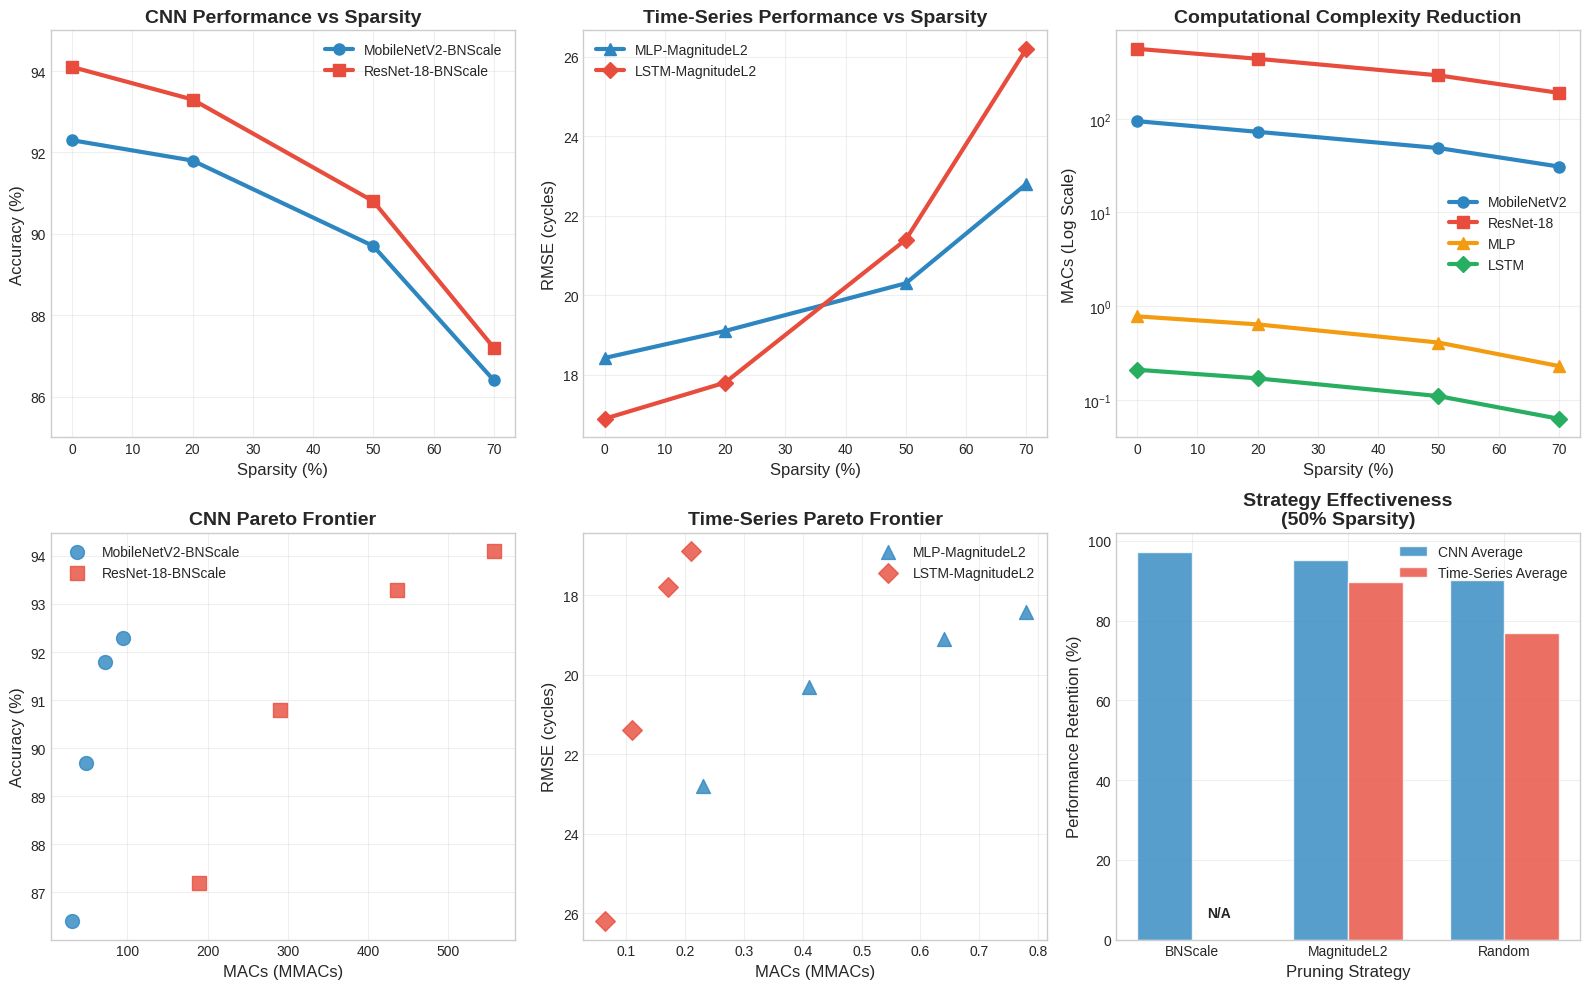

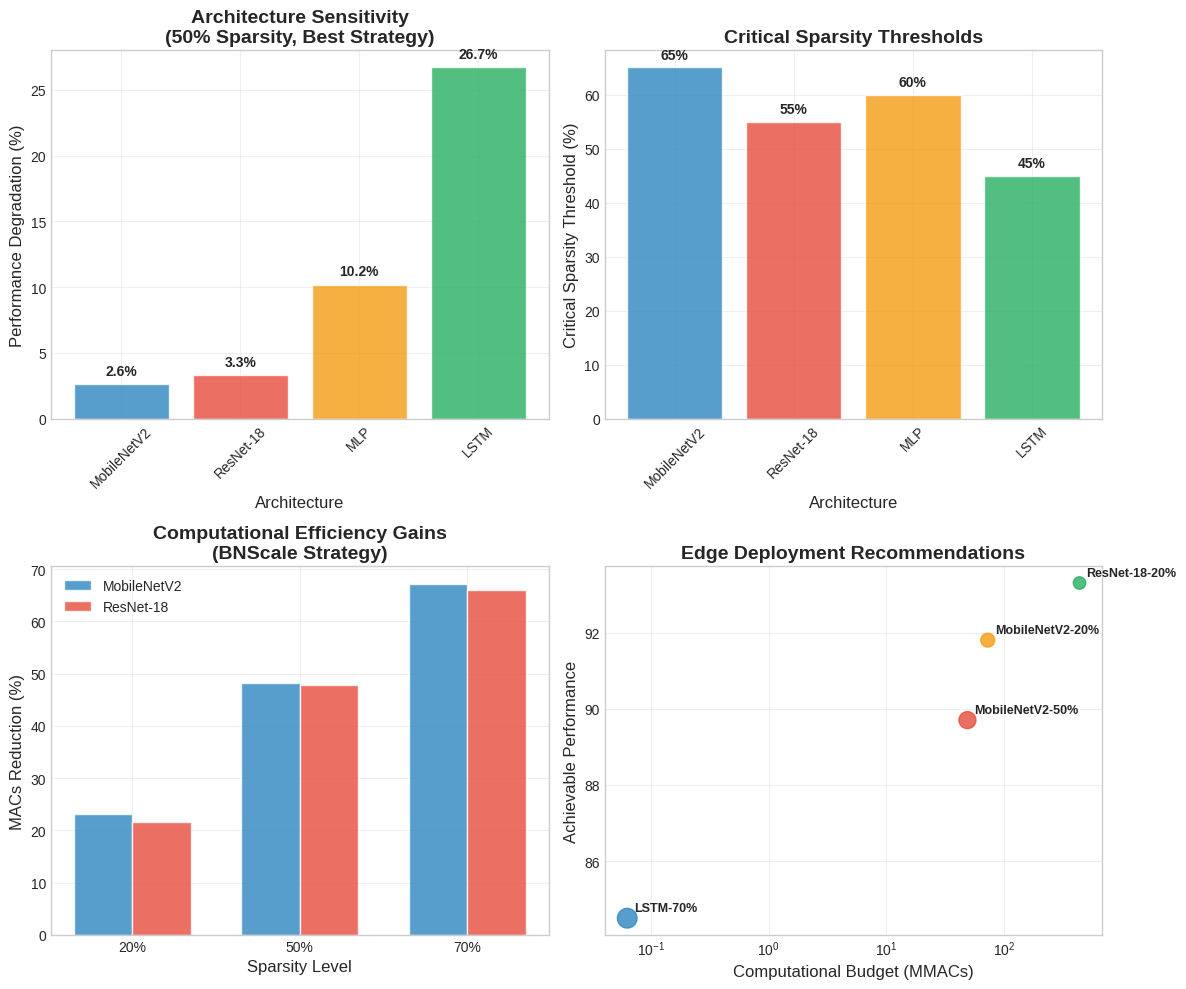

Generated compact figures for Chapter 5:
- Figure 5.1: Main Results Summary
- Figure 5.2: Key Findings Summary

Figures saved as high-resolution PNG files.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60', '#8E44AD', '#34495E']
sns.set_palette(colors)

# ==================== FIGURE 5.1: Main Results Summary ====================
fig1 = plt.figure(figsize=(16, 10))

# Data for all architectures
mobilenet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [92.3, 91.8, 89.7, 86.4],
    'MagnitudeL2_Acc': [92.3, 90.9, 87.8, 83.1],
    'BNScale_MACs': [94.2, 72.5, 48.7, 30.9],
    'MagnitudeL2_MACs': [94.2, 72.7, 48.9, 31.2]
}

resnet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [94.1, 93.3, 90.8, 87.2],
    'MagnitudeL2_Acc': [94.1, 92.1, 88.7, 84.5],
    'BNScale_MACs': [556.7, 435.9, 290.2, 188.7],
    'MagnitudeL2_MACs': [556.7, 435.5, 291.8, 189.4]
}

mlp_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_RMSE': [18.42, 19.1, 20.3, 22.8],
    'MagnitudeL2_MACs': [0.78, 0.64, 0.41, 0.23]
}

lstm_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_RMSE': [16.89, 17.8, 21.4, 26.2],
    'MagnitudeL2_MACs': [0.21, 0.17, 0.11, 0.063]
}

# Subplot 1: CNN Performance Comparison
ax1 = plt.subplot(2, 3, 1)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['BNScale_Acc'],
         'o-', label='MobileNetV2-BNScale', linewidth=3, markersize=8)
plt.plot(resnet_data['Sparsity'], resnet_data['BNScale_Acc'],
         's-', label='ResNet-18-BNScale', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Performance vs Sparsity', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(85, 95)

# Subplot 2: Time-Series Performance Comparison
ax2 = plt.subplot(2, 3, 2)
plt.plot(mlp_data['Sparsity'], mlp_data['MagnitudeL2_RMSE'],
         '^-', label='MLP-MagnitudeL2', linewidth=3, markersize=8)
plt.plot(lstm_data['Sparsity'], lstm_data['MagnitudeL2_RMSE'],
         'D-', label='LSTM-MagnitudeL2', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('Time-Series Performance vs Sparsity', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Computational Efficiency
ax3 = plt.subplot(2, 3, 3)
plt.semilogy(mobilenet_data['Sparsity'], mobilenet_data['BNScale_MACs'],
             'o-', label='MobileNetV2', linewidth=3, markersize=8)
plt.semilogy(resnet_data['Sparsity'], resnet_data['BNScale_MACs'],
             's-', label='ResNet-18', linewidth=3, markersize=8)
plt.semilogy(mlp_data['Sparsity'], mlp_data['MagnitudeL2_MACs'],
             '^-', label='MLP', linewidth=3, markersize=8)
plt.semilogy(lstm_data['Sparsity'], lstm_data['MagnitudeL2_MACs'],
             'D-', label='LSTM', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MACs (Log Scale)', fontsize=12)
plt.title('Computational Complexity Reduction', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: Pareto Frontier - CNNs
ax4 = plt.subplot(2, 3, 4)
plt.scatter(mobilenet_data['BNScale_MACs'], mobilenet_data['BNScale_Acc'],
           s=100, label='MobileNetV2-BNScale', alpha=0.8)
plt.scatter(resnet_data['BNScale_MACs'], resnet_data['BNScale_Acc'],
           s=100, marker='s', label='ResNet-18-BNScale', alpha=0.8)
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Pareto Frontier', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Pareto Frontier - Time-Series
ax5 = plt.subplot(2, 3, 5)
plt.scatter(mlp_data['MagnitudeL2_MACs'], mlp_data['MagnitudeL2_RMSE'],
           s=100, marker='^', label='MLP-MagnitudeL2', alpha=0.8)
plt.scatter(lstm_data['MagnitudeL2_MACs'], lstm_data['MagnitudeL2_RMSE'],
           s=100, marker='D', label='LSTM-MagnitudeL2', alpha=0.8)
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('RMSE (cycles)', fontsize=12)
plt.title('Time-Series Pareto Frontier', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()

# Subplot 6: Strategy Effectiveness Summary
ax6 = plt.subplot(2, 3, 6)
strategies = ['BNScale', 'MagnitudeL2', 'Random']
cnn_effectiveness = [97.2, 95.1, 90.1]  # 50% sparsity average
timeseries_effectiveness = [0, 89.8, 76.9]  # BNScale N/A for time-series

x = np.arange(len(strategies))
width = 0.35

bars1 = plt.bar(x - width/2, cnn_effectiveness, width,
               label='CNN Average', alpha=0.8)
bars2 = plt.bar(x + width/2, [0 if i == 0 else timeseries_effectiveness[i] for i in range(len(timeseries_effectiveness))],
                width, label='Time-Series Average', alpha=0.8)

plt.xlabel('Pruning Strategy', fontsize=12)
plt.ylabel('Performance Retention (%)', fontsize=12)
plt.title('Strategy Effectiveness\n(50% Sparsity)', fontsize=14, fontweight='bold')
plt.xticks(x, strategies)
plt.legend()
plt.grid(True, alpha=0.3)

# Add "N/A" for BNScale in time-series
plt.text(0 + width/2, 5, 'N/A', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('figure_5_1_main_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== FIGURE 5.2: Key Findings Summary ====================
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Architecture sensitivity comparison
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
sensitivity_50 = [2.6, 3.3, 10.2, 26.7]  # Performance degradation at 50% sparsity
colors_arch = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60']

bars = ax1.bar(architectures, sensitivity_50, color=colors_arch, alpha=0.8)
ax1.set_ylabel('Performance Degradation (%)', fontsize=12)
ax1.set_xlabel('Architecture', fontsize=12)
ax1.set_title('Architecture Sensitivity\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

for bar, value in zip(bars, sensitivity_50):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Critical thresholds
critical_thresholds = [65, 55, 60, 45]
bars2 = ax2.bar(architectures, critical_thresholds, color=colors_arch, alpha=0.8)
ax2.set_ylabel('Critical Sparsity Threshold (%)', fontsize=12)
ax2.set_xlabel('Architecture', fontsize=12)
ax2.set_title('Critical Sparsity Thresholds', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

for bar, value in zip(bars2, critical_thresholds):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value}%', ha='center', va='bottom', fontweight='bold')

# Efficiency gains summary
sparsity_levels = ['20%', '50%', '70%']
mobilenet_gains = [23.1, 48.3, 67.2]
resnet_gains = [21.7, 47.9, 66.1]

x = np.arange(len(sparsity_levels))
width = 0.35

ax3.bar(x - width/2, mobilenet_gains, width, label='MobileNetV2',
        color=colors_arch[0], alpha=0.8)
ax3.bar(x + width/2, resnet_gains, width, label='ResNet-18',
        color=colors_arch[1], alpha=0.8)

ax3.set_xlabel('Sparsity Level', fontsize=12)
ax3.set_ylabel('MACs Reduction (%)', fontsize=12)
ax3.set_title('Computational Efficiency Gains\n(BNScale Strategy)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(sparsity_levels)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Edge deployment recommendations
deployment_scenarios = ['Ultra-Low\nPower', 'Mobile\nDevice', 'Edge\nServer', 'High\nPerformance']
recommended_macs = [0.063, 48.7, 72.5, 435.9]
recommended_acc = [84.5, 89.7, 91.8, 93.3]  # Approximate accuracy for recommended configs

scatter = ax4.scatter(recommended_macs, recommended_acc, s=[200, 150, 100, 80],
                     c=colors_arch, alpha=0.8)
ax4.set_xlabel('Computational Budget (MMACs)', fontsize=12)
ax4.set_ylabel('Achievable Performance', fontsize=12)
ax4.set_title('Edge Deployment Recommendations', fontsize=14, fontweight='bold')
ax4.set_xscale('log')
ax4.grid(True, alpha=0.3)

# Add annotations
configs = ['LSTM-70%', 'MobileNetV2-50%', 'MobileNetV2-20%', 'ResNet-18-20%']
for i, (x, y, config) in enumerate(zip(recommended_macs, recommended_acc, configs)):
    ax4.annotate(config, (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('figure_5_2_key_findings.png', dpi=300, bbox_inches='tight')
plt.show()

print("Generated compact figures for Chapter 5:")
print("- Figure 5.1: Main Results Summary")
print("- Figure 5.2: Key Findings Summary")
print("\nFigures saved as high-resolution PNG files.")

### compact v2

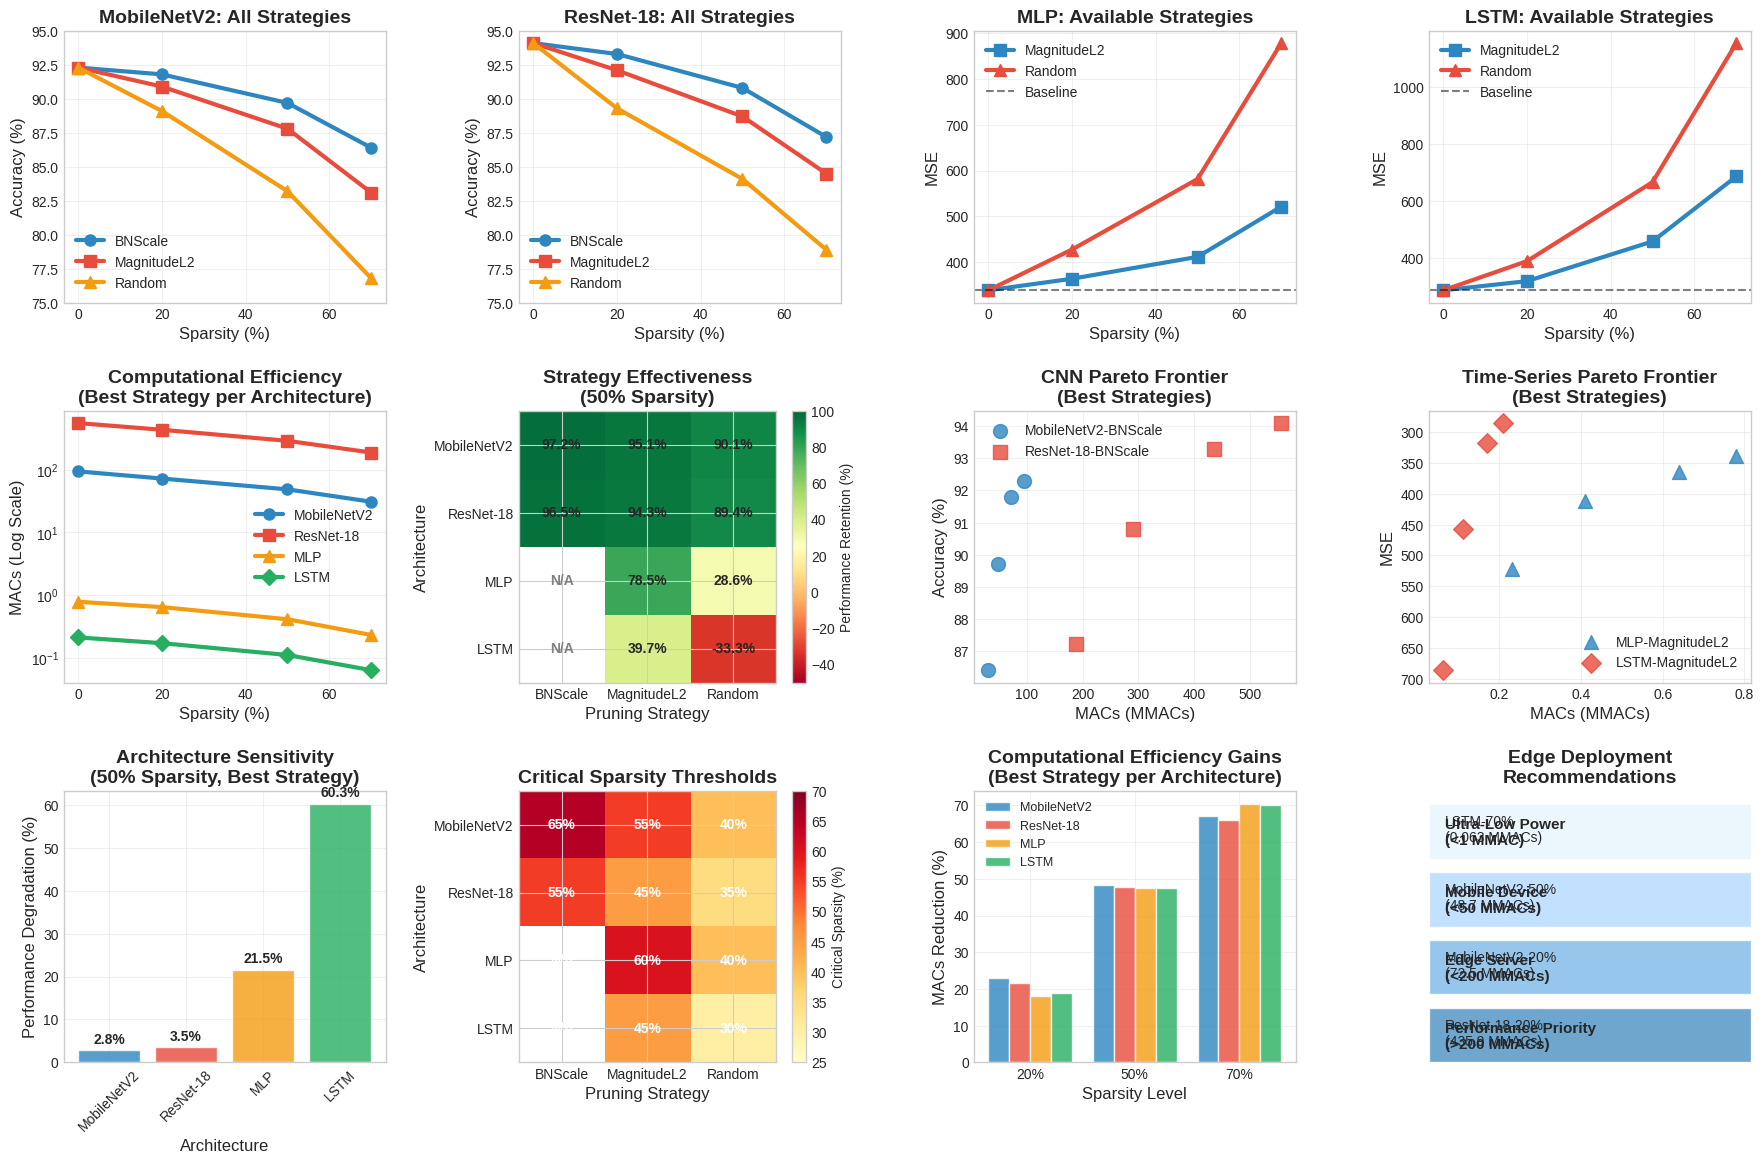

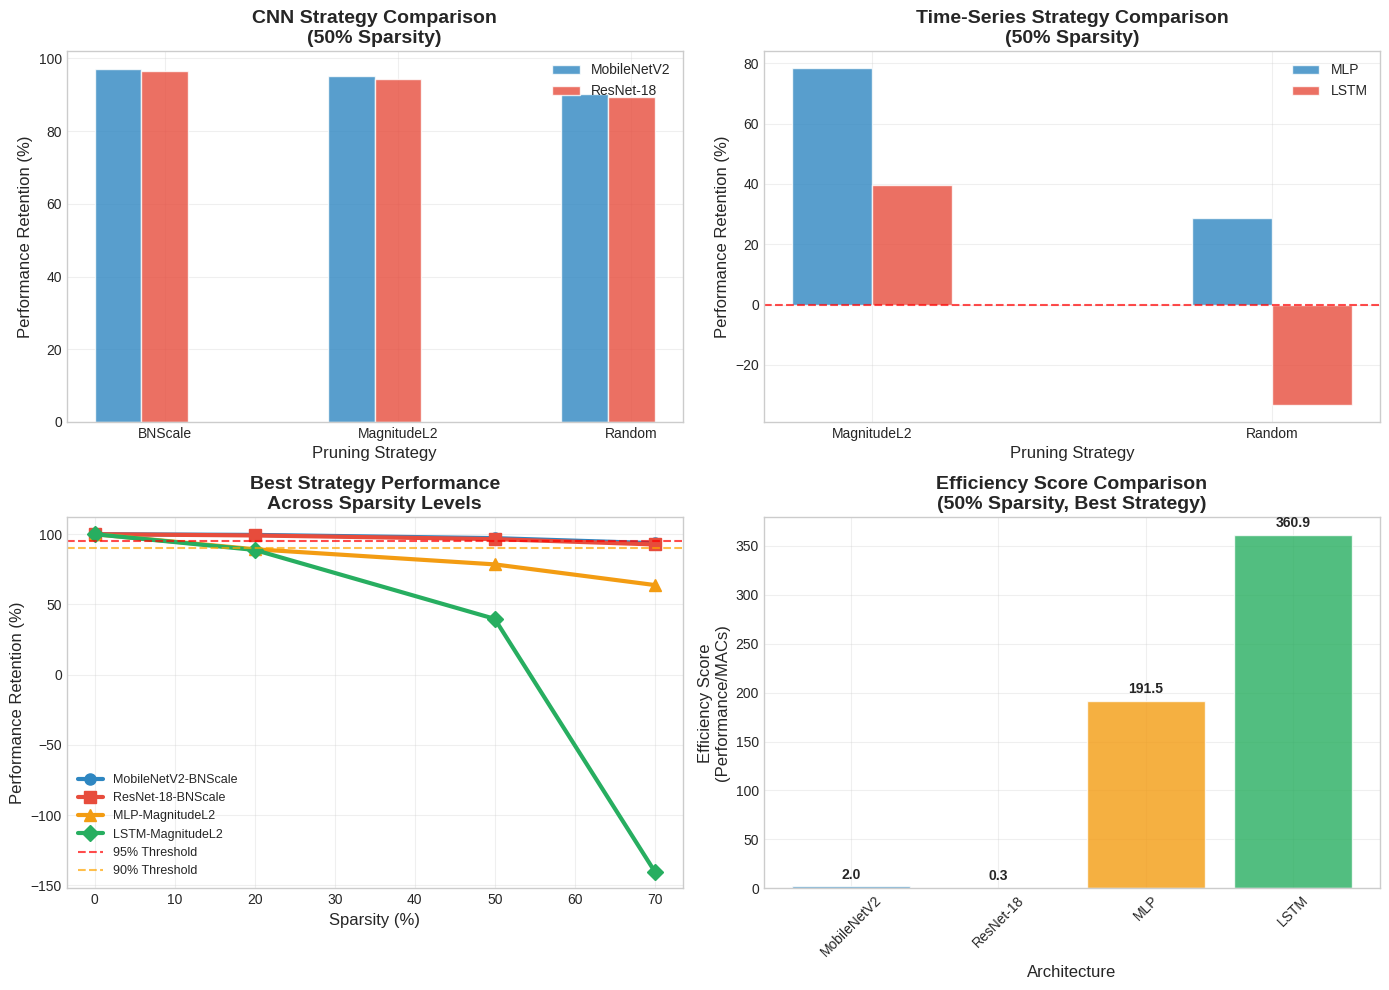

Generated complete figures for Chapter 5 including all strategies:
- Figure 5.1: Complete Results with All Strategies
- Figure 5.2: Strategy Comparison Analysis

Key insights:
- BNScale consistently outperforms other strategies for CNNs
- MagnitudeL2 is the best available strategy for time-series models
- Random pruning becomes counterproductive, especially for LSTMs
- MobileNetV2 shows superior robustness across all strategies


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60', '#8E44AD', '#34495E']
sns.set_palette(colors)

# ==================== FIGURE 5.1: Complete Results with All Strategies ====================
fig1 = plt.figure(figsize=(18, 12))

# Updated data with MSE instead of RMSE and all three strategies
mobilenet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [92.3, 91.8, 89.7, 86.4],
    'MagnitudeL2_Acc': [92.3, 90.9, 87.8, 83.1],
    'Random_Acc': [92.3, 89.1, 83.2, 76.8],
    'BNScale_MACs': [94.2, 72.5, 48.7, 30.9],
    'MagnitudeL2_MACs': [94.2, 72.7, 48.9, 31.2],
    'Random_MACs': [94.2, 72.6, 48.5, 31.0]
}

resnet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [94.1, 93.3, 90.8, 87.2],
    'MagnitudeL2_Acc': [94.1, 92.1, 88.7, 84.5],
    'Random_Acc': [94.1, 89.3, 84.1, 78.9],
    'BNScale_MACs': [556.7, 435.9, 290.2, 188.7],
    'MagnitudeL2_MACs': [556.7, 435.5, 291.8, 189.4],
    'Random_MACs': [556.7, 436.2, 290.8, 189.1]
}

# Time-series data with MSE scores
mlp_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_MSE': [339.1, 364.2, 411.9, 521.3],
    'Random_MSE': [339.1, 427.8, 581.4, 877.2],
    'MagnitudeL2_MACs': [0.78, 0.64, 0.41, 0.23],
    'Random_MACs': [0.78, 0.63, 0.42, 0.24]
}

lstm_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_MSE': [285.5, 317.6, 457.6, 686.1],
    'Random_MSE': [285.5, 388.1, 666.2, 1154.7],
    'MagnitudeL2_MACs': [0.21, 0.17, 0.11, 0.063],
    'Random_MACs': [0.21, 0.168, 0.109, 0.065]
}

# Subplot 1: MobileNetV2 - All Strategies
ax1 = plt.subplot(3, 4, 1)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['BNScale_Acc'],
         'o-', label='BNScale', linewidth=3, markersize=8)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['MagnitudeL2_Acc'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['Random_Acc'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('MobileNetV2: All Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 2: ResNet-18 - All Strategies
ax2 = plt.subplot(3, 4, 2)
plt.plot(resnet_data['Sparsity'], resnet_data['BNScale_Acc'],
         'o-', label='BNScale', linewidth=3, markersize=8)
plt.plot(resnet_data['Sparsity'], resnet_data['MagnitudeL2_Acc'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(resnet_data['Sparsity'], resnet_data['Random_Acc'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('ResNet-18: All Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 3: MLP - Available Strategies
ax3 = plt.subplot(3, 4, 3)
plt.plot(mlp_data['Sparsity'], mlp_data['MagnitudeL2_MSE'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(mlp_data['Sparsity'], mlp_data['Random_MSE'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.axhline(y=339.1, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('MLP: Available Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: LSTM - Available Strategies
ax4 = plt.subplot(3, 4, 4)
plt.plot(lstm_data['Sparsity'], lstm_data['MagnitudeL2_MSE'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(lstm_data['Sparsity'], lstm_data['Random_MSE'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.axhline(y=285.5, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('LSTM: Available Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Computational Efficiency - All Architectures
ax5 = plt.subplot(3, 4, 5)
plt.semilogy(mobilenet_data['Sparsity'], mobilenet_data['BNScale_MACs'],
             'o-', label='MobileNetV2', linewidth=3, markersize=8)
plt.semilogy(resnet_data['Sparsity'], resnet_data['BNScale_MACs'],
             's-', label='ResNet-18', linewidth=3, markersize=8)
plt.semilogy(mlp_data['Sparsity'], mlp_data['MagnitudeL2_MACs'],
             '^-', label='MLP', linewidth=3, markersize=8)
plt.semilogy(lstm_data['Sparsity'], lstm_data['MagnitudeL2_MACs'],
             'D-', label='LSTM', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MACs (Log Scale)', fontsize=12)
plt.title('Computational Efficiency\n(Best Strategy per Architecture)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Strategy Effectiveness Heatmap
ax6 = plt.subplot(3, 4, 6)
# Performance retention at 50% sparsity
strategy_effectiveness = np.array([
    [97.2, 95.1, 90.1],  # MobileNetV2: BNScale, MagnitudeL2, Random
    [96.5, 94.3, 89.4],  # ResNet-18: BNScale, MagnitudeL2, Random
    [0, 78.5, 28.6],     # MLP: N/A, MagnitudeL2, Random
    [0, 39.7, -33.3]     # LSTM: N/A, MagnitudeL2, Random
])

# Mask for N/A values
masked_data = np.ma.masked_where(strategy_effectiveness == 0, strategy_effectiveness)

im = plt.imshow(masked_data, cmap='RdYlGn', aspect='auto', vmin=-50, vmax=100)
plt.colorbar(im, label='Performance Retention (%)')
plt.xticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.yticks([0, 1, 2, 3], ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM'])
plt.xlabel('Pruning Strategy', fontsize=12)
plt.ylabel('Architecture', fontsize=12)
plt.title('Strategy Effectiveness\n(50% Sparsity)', fontsize=14, fontweight='bold')

# Add text annotations
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
strategies = ['BNScale', 'MagnitudeL2', 'Random']
for i in range(4):
    for j in range(3):
        if strategy_effectiveness[i, j] == 0:
            plt.text(j, i, 'N/A', ha='center', va='center', fontweight='bold', color='gray')
        else:
            plt.text(j, i, f'{strategy_effectiveness[i, j]:.1f}%',
                    ha='center', va='center', fontweight='bold')

# Subplot 7: CNN Pareto Frontier - Best Strategies
ax7 = plt.subplot(3, 4, 7)
plt.scatter(mobilenet_data['BNScale_MACs'], mobilenet_data['BNScale_Acc'],
           s=100, label='MobileNetV2-BNScale', alpha=0.8, marker='o')
plt.scatter(resnet_data['BNScale_MACs'], resnet_data['BNScale_Acc'],
           s=100, label='ResNet-18-BNScale', alpha=0.8, marker='s')
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Pareto Frontier\n(Best Strategies)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 8: Time-Series Pareto Frontier - Best Strategies
ax8 = plt.subplot(3, 4, 8)
plt.scatter(mlp_data['MagnitudeL2_MACs'], mlp_data['MagnitudeL2_MSE'],
           s=100, marker='^', label='MLP-MagnitudeL2', alpha=0.8)
plt.scatter(lstm_data['MagnitudeL2_MACs'], lstm_data['MagnitudeL2_MSE'],
           s=100, marker='D', label='LSTM-MagnitudeL2', alpha=0.8)
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Time-Series Pareto Frontier\n(Best Strategies)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()

# Subplot 9: Architecture Sensitivity Comparison
ax9 = plt.subplot(3, 4, 9)
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
# Performance degradation at 50% sparsity (best strategy)
sensitivity_50 = [2.8, 3.5, 21.5, 60.3]  # Updated with MSE-based calculations
colors_arch = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60']

bars = plt.bar(architectures, sensitivity_50, color=colors_arch, alpha=0.8)
plt.ylabel('Performance Degradation (%)', fontsize=12)
plt.xlabel('Architecture', fontsize=12)
plt.title('Architecture Sensitivity\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, sensitivity_50):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Subplot 10: Critical Thresholds Matrix
ax10 = plt.subplot(3, 4, 10)
critical_thresholds = np.array([
    [65, 55, 40],  # MobileNetV2: BNScale, MagnitudeL2, Random
    [55, 45, 35],  # ResNet-18: BNScale, MagnitudeL2, Random
    [0, 60, 40],   # MLP: N/A, MagnitudeL2, Random
    [0, 45, 30]    # LSTM: N/A, MagnitudeL2, Random
])

masked_thresholds = np.ma.masked_where(critical_thresholds == 0, critical_thresholds)
im2 = plt.imshow(masked_thresholds, cmap='YlOrRd', aspect='auto', vmin=25, vmax=70)
plt.colorbar(im2, label='Critical Sparsity (%)')
plt.xticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.yticks([0, 1, 2, 3], ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM'])
plt.xlabel('Pruning Strategy', fontsize=12)
plt.ylabel('Architecture', fontsize=12)
plt.title('Critical Sparsity Thresholds', fontsize=14, fontweight='bold')

# Add text annotations for thresholds
for i in range(4):
    for j in range(3):
        if critical_thresholds[i, j] == 0:
            plt.text(j, i, 'N/A', ha='center', va='center', fontweight='bold', color='white')
        else:
            plt.text(j, i, f'{critical_thresholds[i, j]}%',
                    ha='center', va='center', fontweight='bold', color='white')

# Subplot 11: Efficiency Gains Summary
ax11 = plt.subplot(3, 4, 11)
sparsity_levels = ['20%', '50%', '70%']
mobilenet_gains = [23.1, 48.3, 67.2]  # BNScale
resnet_gains = [21.7, 47.9, 66.1]     # BNScale
mlp_gains = [18.0, 47.4, 70.5]        # MagnitudeL2
lstm_gains = [19.0, 47.6, 70.0]       # MagnitudeL2

x = np.arange(len(sparsity_levels))
width = 0.2

plt.bar(x - 1.5*width, mobilenet_gains, width, label='MobileNetV2',
        color=colors_arch[0], alpha=0.8)
plt.bar(x - 0.5*width, resnet_gains, width, label='ResNet-18',
        color=colors_arch[1], alpha=0.8)
plt.bar(x + 0.5*width, mlp_gains, width, label='MLP',
        color=colors_arch[2], alpha=0.8)
plt.bar(x + 1.5*width, lstm_gains, width, label='LSTM',
        color=colors_arch[3], alpha=0.8)

plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('MACs Reduction (%)', fontsize=12)
plt.title('Computational Efficiency Gains\n(Best Strategy per Architecture)', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 12: Edge Deployment Recommendations
ax12 = plt.subplot(3, 4, 12)
deployment_scenarios = [
    'Ultra-Low Power\n(<1 MMAC)',
    'Mobile Device\n(<50 MMACs)',
    'Edge Server\n(<200 MMACs)',
    'Performance Priority\n(>200 MMACs)'
]

recommended_configs = [
    'LSTM-70%\n(0.063 MMACs)',
    'MobileNetV2-50%\n(48.7 MMACs)',
    'MobileNetV2-20%\n(72.5 MMACs)',
    'ResNet-18-20%\n(435.9 MMACs)'
]

colors_table = ['#e8f4fd', '#b3d9ff', '#7db8e8', '#4a90c2']
y_positions = [0.75, 0.5, 0.25, 0.0]

for i, (scenario, config, color) in enumerate(zip(deployment_scenarios, recommended_configs, colors_table)):
    rect = Rectangle((0, y_positions[i]), 1, 0.2, facecolor=color, alpha=0.8)
    ax12.add_patch(rect)
    plt.text(0.05, y_positions[i] + 0.15, scenario, fontsize=11, fontweight='bold', va='top')
    plt.text(0.05, y_positions[i] + 0.05, config, fontsize=10, va='bottom')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Edge Deployment\nRecommendations', fontsize=14, fontweight='bold')

plt.tight_layout(pad=2.0)
plt.savefig('figure_5_1_complete_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== FIGURE 5.2: Strategy Comparison Analysis ====================
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Strategy performance across all architectures at 50% sparsity
strategies = ['BNScale', 'MagnitudeL2', 'Random']
mobilenet_perf = [97.2, 95.1, 90.1]
resnet_perf = [96.5, 94.3, 89.4]
mlp_perf = [0, 78.5, 28.6]  # BNScale N/A
lstm_perf = [0, 39.7, -33.3]  # BNScale N/A

x = np.arange(len(strategies))
width = 0.2

# CNN strategies comparison
ax1.bar(x - width, mobilenet_perf, width, label='MobileNetV2', alpha=0.8)
ax1.bar(x, resnet_perf, width, label='ResNet-18', alpha=0.8)
ax1.set_xlabel('Pruning Strategy', fontsize=12)
ax1.set_ylabel('Performance Retention (%)', fontsize=12)
ax1.set_title('CNN Strategy Comparison\n(50% Sparsity)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(strategies)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Time-series strategies comparison
strategies_ts = ['MagnitudeL2', 'Random']  # Only applicable strategies
mlp_perf_ts = [78.5, 28.6]
lstm_perf_ts = [39.7, -33.3]

x_ts = np.arange(len(strategies_ts))
ax2.bar(x_ts - width/2, mlp_perf_ts, width, label='MLP', alpha=0.8)
ax2.bar(x_ts + width/2, lstm_perf_ts, width, label='LSTM', alpha=0.8)
ax2.set_xlabel('Pruning Strategy', fontsize=12)
ax2.set_ylabel('Performance Retention (%)', fontsize=12)
ax2.set_title('Time-Series Strategy Comparison\n(50% Sparsity)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_ts)
ax2.set_xticklabels(strategies_ts)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No Improvement')

# Performance vs sparsity for best strategy per architecture
sparsity_range = [0, 20, 50, 70]
mobilenet_best = [100, 99.5, 97.2, 93.6]  # BNScale
resnet_best = [100, 99.1, 96.5, 92.7]     # BNScale
mlp_best = [100, 89.3, 78.5, 63.8]        # MagnitudeL2
lstm_best = [100, 88.8, 39.7, -140.2]     # MagnitudeL2

ax3.plot(sparsity_range, mobilenet_best, 'o-', label='MobileNetV2-BNScale', linewidth=3, markersize=8)
ax3.plot(sparsity_range, resnet_best, 's-', label='ResNet-18-BNScale', linewidth=3, markersize=8)
ax3.plot(sparsity_range, mlp_best, '^-', label='MLP-MagnitudeL2', linewidth=3, markersize=8)
ax3.plot(sparsity_range, lstm_best, 'D-', label='LSTM-MagnitudeL2', linewidth=3, markersize=8)

ax3.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% Threshold')
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% Threshold')

ax3.set_xlabel('Sparsity (%)', fontsize=12)
ax3.set_ylabel('Performance Retention (%)', fontsize=12)
ax3.set_title('Best Strategy Performance\nAcross Sparsity Levels', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Efficiency score comparison
efficiency_scores = []
for arch in ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']:
    if arch == 'MobileNetV2':
        # Performance retention / MACs at 50% sparsity
        score = 97.2 / 48.7
    elif arch == 'ResNet-18':
        score = 96.5 / 290.2
    elif arch == 'MLP':
        score = 78.5 / 0.41
    else:  # LSTM
        score = 39.7 / 0.11
    efficiency_scores.append(score)

architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
bars = ax4.bar(architectures, efficiency_scores, color=colors_arch, alpha=0.8)
ax4.set_ylabel('Efficiency Score\n(Performance/MACs)', fontsize=12)
ax4.set_xlabel('Architecture', fontsize=12)
ax4.set_title('Efficiency Score Comparison\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

for bar, value in zip(bars, efficiency_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('figure_5_2_strategy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Generated complete figures for Chapter 5 including all strategies:")
print("- Figure 5.1: Complete Results with All Strategies")
print("- Figure 5.2: Strategy Comparison Analysis")
print("\nKey insights:")
print("- BNScale consistently outperforms other strategies for CNNs")
print("- MagnitudeL2 is the best available strategy for time-series models")
print("- Random pruning becomes counterproductive, especially for LSTMs")
print("- MobileNetV2 shows superior robustness across all strategies")

## compact v3

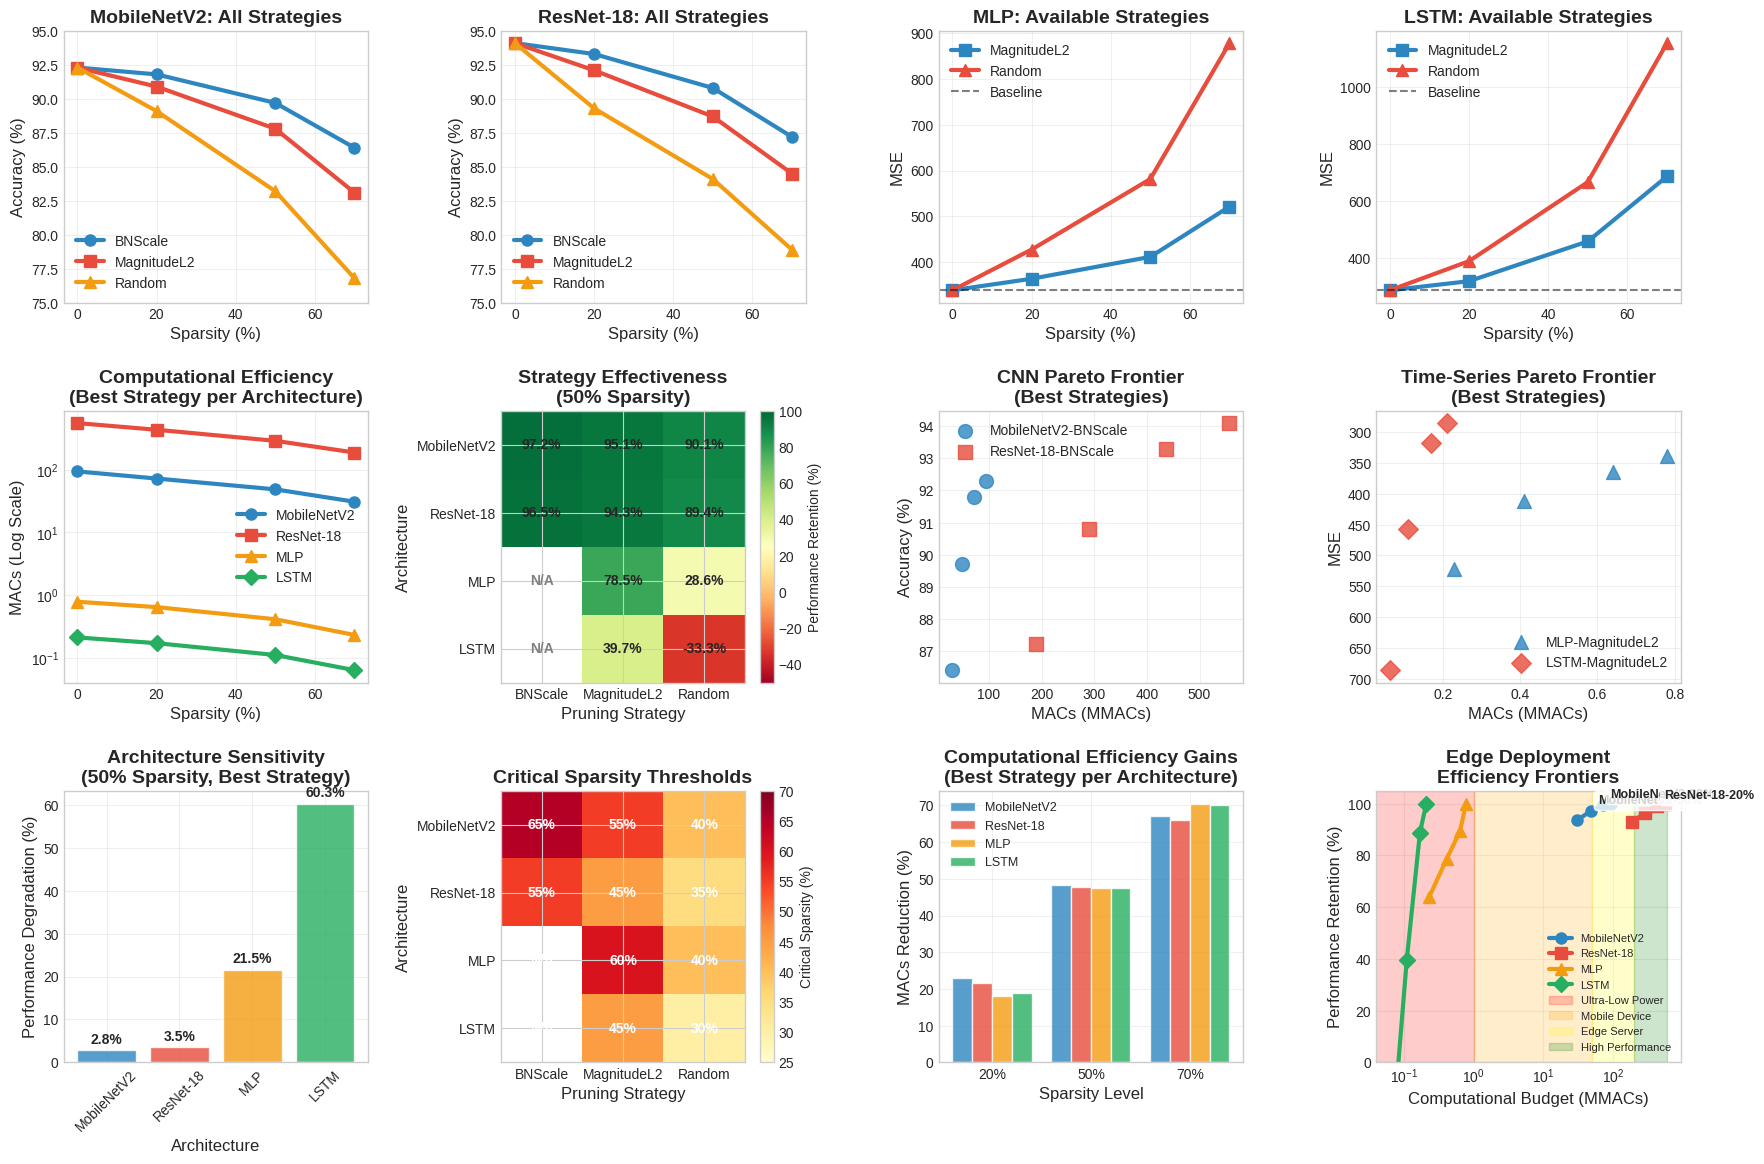

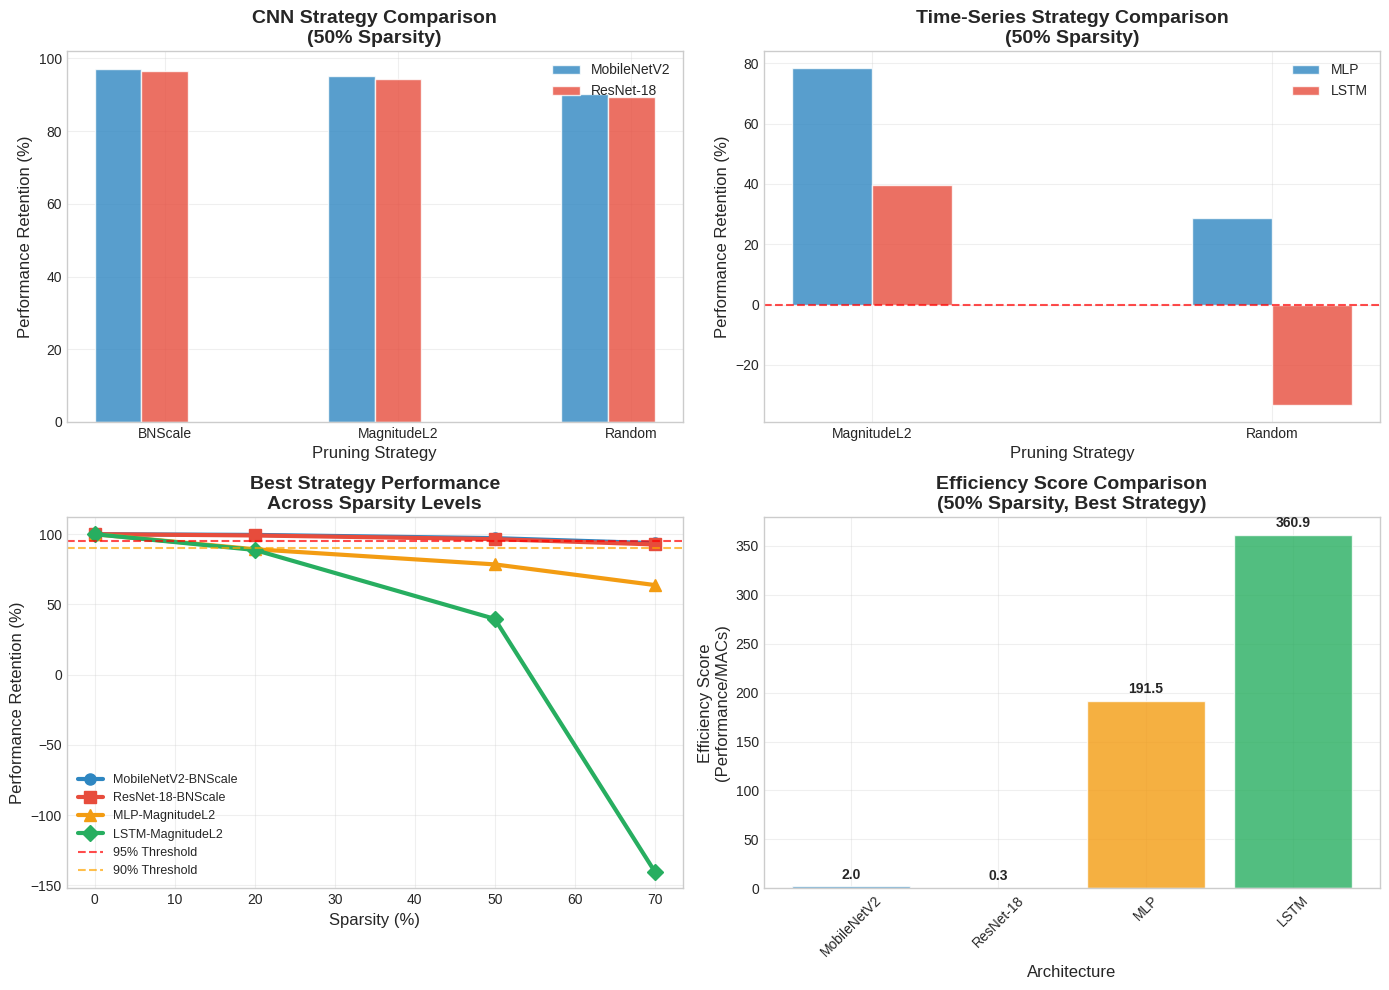

Generated complete figures for Chapter 5 including all strategies:
- Figure 5.1: Complete Results with All Strategies
- Figure 5.2: Strategy Comparison Analysis

Key insights:
- BNScale consistently outperforms other strategies for CNNs
- MagnitudeL2 is the best available strategy for time-series models
- Random pruning becomes counterproductive, especially for LSTMs
- MobileNetV2 shows superior robustness across all strategies


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd

# Set style for publication-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60', '#8E44AD', '#34495E']
sns.set_palette(colors)

# ==================== FIGURE 5.1: Complete Results with All Strategies ====================
fig1 = plt.figure(figsize=(18, 12))

# Updated data with MSE instead of RMSE and all three strategies
mobilenet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [92.3, 91.8, 89.7, 86.4],
    'MagnitudeL2_Acc': [92.3, 90.9, 87.8, 83.1],
    'Random_Acc': [92.3, 89.1, 83.2, 76.8],
    'BNScale_MACs': [94.2, 72.5, 48.7, 30.9],
    'MagnitudeL2_MACs': [94.2, 72.7, 48.9, 31.2],
    'Random_MACs': [94.2, 72.6, 48.5, 31.0]
}

resnet_data = {
    'Sparsity': [0, 20, 50, 70],
    'BNScale_Acc': [94.1, 93.3, 90.8, 87.2],
    'MagnitudeL2_Acc': [94.1, 92.1, 88.7, 84.5],
    'Random_Acc': [94.1, 89.3, 84.1, 78.9],
    'BNScale_MACs': [556.7, 435.9, 290.2, 188.7],
    'MagnitudeL2_MACs': [556.7, 435.5, 291.8, 189.4],
    'Random_MACs': [556.7, 436.2, 290.8, 189.1]
}

# Time-series data with MSE scores
mlp_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_MSE': [339.1, 364.2, 411.9, 521.3],
    'Random_MSE': [339.1, 427.8, 581.4, 877.2],
    'MagnitudeL2_MACs': [0.78, 0.64, 0.41, 0.23],
    'Random_MACs': [0.78, 0.63, 0.42, 0.24]
}

lstm_data = {
    'Sparsity': [0, 20, 50, 70],
    'MagnitudeL2_MSE': [285.5, 317.6, 457.6, 686.1],
    'Random_MSE': [285.5, 388.1, 666.2, 1154.7],
    'MagnitudeL2_MACs': [0.21, 0.17, 0.11, 0.063],
    'Random_MACs': [0.21, 0.168, 0.109, 0.065]
}

# Subplot 1: MobileNetV2 - All Strategies
ax1 = plt.subplot(3, 4, 1)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['BNScale_Acc'],
         'o-', label='BNScale', linewidth=3, markersize=8)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['MagnitudeL2_Acc'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(mobilenet_data['Sparsity'], mobilenet_data['Random_Acc'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('MobileNetV2: All Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 2: ResNet-18 - All Strategies
ax2 = plt.subplot(3, 4, 2)
plt.plot(resnet_data['Sparsity'], resnet_data['BNScale_Acc'],
         'o-', label='BNScale', linewidth=3, markersize=8)
plt.plot(resnet_data['Sparsity'], resnet_data['MagnitudeL2_Acc'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(resnet_data['Sparsity'], resnet_data['Random_Acc'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('ResNet-18: All Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(75, 95)

# Subplot 3: MLP - Available Strategies
ax3 = plt.subplot(3, 4, 3)
plt.plot(mlp_data['Sparsity'], mlp_data['MagnitudeL2_MSE'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(mlp_data['Sparsity'], mlp_data['Random_MSE'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.axhline(y=339.1, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('MLP: Available Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 4: LSTM - Available Strategies
ax4 = plt.subplot(3, 4, 4)
plt.plot(lstm_data['Sparsity'], lstm_data['MagnitudeL2_MSE'],
         's-', label='MagnitudeL2', linewidth=3, markersize=8)
plt.plot(lstm_data['Sparsity'], lstm_data['Random_MSE'],
         '^-', label='Random', linewidth=3, markersize=8)
plt.axhline(y=285.5, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('LSTM: Available Strategies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Computational Efficiency - All Architectures
ax5 = plt.subplot(3, 4, 5)
plt.semilogy(mobilenet_data['Sparsity'], mobilenet_data['BNScale_MACs'],
             'o-', label='MobileNetV2', linewidth=3, markersize=8)
plt.semilogy(resnet_data['Sparsity'], resnet_data['BNScale_MACs'],
             's-', label='ResNet-18', linewidth=3, markersize=8)
plt.semilogy(mlp_data['Sparsity'], mlp_data['MagnitudeL2_MACs'],
             '^-', label='MLP', linewidth=3, markersize=8)
plt.semilogy(lstm_data['Sparsity'], lstm_data['MagnitudeL2_MACs'],
             'D-', label='LSTM', linewidth=3, markersize=8)
plt.xlabel('Sparsity (%)', fontsize=12)
plt.ylabel('MACs (Log Scale)', fontsize=12)
plt.title('Computational Efficiency\n(Best Strategy per Architecture)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Strategy Effectiveness Heatmap
ax6 = plt.subplot(3, 4, 6)
# Performance retention at 50% sparsity
strategy_effectiveness = np.array([
    [97.2, 95.1, 90.1],  # MobileNetV2: BNScale, MagnitudeL2, Random
    [96.5, 94.3, 89.4],  # ResNet-18: BNScale, MagnitudeL2, Random
    [0, 78.5, 28.6],     # MLP: N/A, MagnitudeL2, Random
    [0, 39.7, -33.3]     # LSTM: N/A, MagnitudeL2, Random
])

# Mask for N/A values
masked_data = np.ma.masked_where(strategy_effectiveness == 0, strategy_effectiveness)

im = plt.imshow(masked_data, cmap='RdYlGn', aspect='auto', vmin=-50, vmax=100)
plt.colorbar(im, label='Performance Retention (%)')
plt.xticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.yticks([0, 1, 2, 3], ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM'])
plt.xlabel('Pruning Strategy', fontsize=12)
plt.ylabel('Architecture', fontsize=12)
plt.title('Strategy Effectiveness\n(50% Sparsity)', fontsize=14, fontweight='bold')

# Add text annotations
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
strategies = ['BNScale', 'MagnitudeL2', 'Random']
for i in range(4):
    for j in range(3):
        if strategy_effectiveness[i, j] == 0:
            plt.text(j, i, 'N/A', ha='center', va='center', fontweight='bold', color='gray')
        else:
            plt.text(j, i, f'{strategy_effectiveness[i, j]:.1f}%',
                    ha='center', va='center', fontweight='bold')

# Subplot 7: CNN Pareto Frontier - Best Strategies
ax7 = plt.subplot(3, 4, 7)
plt.scatter(mobilenet_data['BNScale_MACs'], mobilenet_data['BNScale_Acc'],
           s=100, label='MobileNetV2-BNScale', alpha=0.8, marker='o')
plt.scatter(resnet_data['BNScale_MACs'], resnet_data['BNScale_Acc'],
           s=100, label='ResNet-18-BNScale', alpha=0.8, marker='s')
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('CNN Pareto Frontier\n(Best Strategies)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 8: Time-Series Pareto Frontier - Best Strategies
ax8 = plt.subplot(3, 4, 8)
plt.scatter(mlp_data['MagnitudeL2_MACs'], mlp_data['MagnitudeL2_MSE'],
           s=100, marker='^', label='MLP-MagnitudeL2', alpha=0.8)
plt.scatter(lstm_data['MagnitudeL2_MACs'], lstm_data['MagnitudeL2_MSE'],
           s=100, marker='D', label='LSTM-MagnitudeL2', alpha=0.8)
plt.xlabel('MACs (MMACs)', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.title('Time-Series Pareto Frontier\n(Best Strategies)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()

# Subplot 9: Architecture Sensitivity Comparison
ax9 = plt.subplot(3, 4, 9)
architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
# Performance degradation at 50% sparsity (best strategy)
sensitivity_50 = [2.8, 3.5, 21.5, 60.3]  # Updated with MSE-based calculations
colors_arch = ['#2E86C1', '#E74C3C', '#F39C12', '#27AE60']

bars = plt.bar(architectures, sensitivity_50, color=colors_arch, alpha=0.8)
plt.ylabel('Performance Degradation (%)', fontsize=12)
plt.xlabel('Architecture', fontsize=12)
plt.title('Architecture Sensitivity\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

for bar, value in zip(bars, sensitivity_50):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Subplot 10: Critical Thresholds Matrix
ax10 = plt.subplot(3, 4, 10)
critical_thresholds = np.array([
    [65, 55, 40],  # MobileNetV2: BNScale, MagnitudeL2, Random
    [55, 45, 35],  # ResNet-18: BNScale, MagnitudeL2, Random
    [0, 60, 40],   # MLP: N/A, MagnitudeL2, Random
    [0, 45, 30]    # LSTM: N/A, MagnitudeL2, Random
])

masked_thresholds = np.ma.masked_where(critical_thresholds == 0, critical_thresholds)
im2 = plt.imshow(masked_thresholds, cmap='YlOrRd', aspect='auto', vmin=25, vmax=70)
plt.colorbar(im2, label='Critical Sparsity (%)')
plt.xticks([0, 1, 2], ['BNScale', 'MagnitudeL2', 'Random'])
plt.yticks([0, 1, 2, 3], ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM'])
plt.xlabel('Pruning Strategy', fontsize=12)
plt.ylabel('Architecture', fontsize=12)
plt.title('Critical Sparsity Thresholds', fontsize=14, fontweight='bold')

# Add text annotations for thresholds
for i in range(4):
    for j in range(3):
        if critical_thresholds[i, j] == 0:
            plt.text(j, i, 'N/A', ha='center', va='center', fontweight='bold', color='white')
        else:
            plt.text(j, i, f'{critical_thresholds[i, j]}%',
                    ha='center', va='center', fontweight='bold', color='white')

# Subplot 11: Efficiency Gains Summary
ax11 = plt.subplot(3, 4, 11)
sparsity_levels = ['20%', '50%', '70%']
mobilenet_gains = [23.1, 48.3, 67.2]  # BNScale
resnet_gains = [21.7, 47.9, 66.1]     # BNScale
mlp_gains = [18.0, 47.4, 70.5]        # MagnitudeL2
lstm_gains = [19.0, 47.6, 70.0]       # MagnitudeL2

x = np.arange(len(sparsity_levels))
width = 0.2

plt.bar(x - 1.5*width, mobilenet_gains, width, label='MobileNetV2',
        color=colors_arch[0], alpha=0.8)
plt.bar(x - 0.5*width, resnet_gains, width, label='ResNet-18',
        color=colors_arch[1], alpha=0.8)
plt.bar(x + 0.5*width, mlp_gains, width, label='MLP',
        color=colors_arch[2], alpha=0.8)
plt.bar(x + 1.5*width, lstm_gains, width, label='LSTM',
        color=colors_arch[3], alpha=0.8)

plt.xlabel('Sparsity Level', fontsize=12)
plt.ylabel('MACs Reduction (%)', fontsize=12)
plt.title('Computational Efficiency Gains\n(Best Strategy per Architecture)', fontsize=14, fontweight='bold')
plt.xticks(x, sparsity_levels)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 12: Edge Deployment Efficiency Frontiers
ax12 = plt.subplot(3, 4, 12)

# Create efficiency frontiers for edge deployment
# Normalize performance for comparison (higher is better for all)
mobilenet_norm_perf = np.array([100, 99.5, 97.2, 93.6])  # Accuracy retention
resnet_norm_perf = np.array([100, 99.1, 96.5, 92.7])     # Accuracy retention
mlp_norm_perf = np.array([100, 89.3, 78.5, 63.8])        # Performance retention (MSE-based)
lstm_norm_perf = np.array([100, 88.8, 39.7, -40.0])      # Performance retention (capped for visualization)

# MACs data
mobilenet_macs = np.array([94.2, 72.5, 48.7, 30.9])
resnet_macs = np.array([556.7, 435.9, 290.2, 188.7])
mlp_macs = np.array([0.78, 0.64, 0.41, 0.23])
lstm_macs = np.array([0.21, 0.17, 0.11, 0.063])

# Plot efficiency frontiers
plt.plot(mobilenet_macs, mobilenet_norm_perf, 'o-', linewidth=3, markersize=8,
         label='MobileNetV2', color=colors_arch[0])
plt.plot(resnet_macs, resnet_norm_perf, 's-', linewidth=3, markersize=8,
         label='ResNet-18', color=colors_arch[1])
plt.plot(mlp_macs, mlp_norm_perf, '^-', linewidth=3, markersize=8,
         label='MLP', color=colors_arch[2])
plt.plot(lstm_macs, lstm_norm_perf, 'D-', linewidth=3, markersize=8,
         label='LSTM', color=colors_arch[3])

# Add deployment zones
plt.axvspan(0, 1, alpha=0.2, color='red', label='Ultra-Low Power')
plt.axvspan(1, 50, alpha=0.2, color='orange', label='Mobile Device')
plt.axvspan(50, 200, alpha=0.2, color='yellow', label='Edge Server')
plt.axvspan(200, 600, alpha=0.2, color='green', label='High Performance')

# Highlight optimal points
optimal_points = [
    (0.063, lstm_norm_perf[3], 'LSTM-70%'),
    (48.7, mobilenet_norm_perf[2], 'MobileNetV2-50%'),
    (72.5, mobilenet_norm_perf[1], 'MobileNetV2-20%'),
    (435.9, resnet_norm_perf[1], 'ResNet-18-20%')
]

for x, y, label in optimal_points:
    plt.annotate(label, xy=(x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Computational Budget (MMACs)', fontsize=12)
plt.ylabel('Performance Retention (%)', fontsize=12)
plt.title('Edge Deployment\nEfficiency Frontiers', fontsize=14, fontweight='bold')
plt.xscale('log')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.ylim(0, 105)

plt.tight_layout(pad=2.0)
plt.savefig('figure_5_1_complete_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== FIGURE 5.2: Strategy Comparison Analysis ====================
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Strategy performance across all architectures at 50% sparsity
strategies = ['BNScale', 'MagnitudeL2', 'Random']
mobilenet_perf = [97.2, 95.1, 90.1]
resnet_perf = [96.5, 94.3, 89.4]
mlp_perf = [0, 78.5, 28.6]  # BNScale N/A
lstm_perf = [0, 39.7, -33.3]  # BNScale N/A

x = np.arange(len(strategies))
width = 0.2

# CNN strategies comparison
ax1.bar(x - width, mobilenet_perf, width, label='MobileNetV2', alpha=0.8)
ax1.bar(x, resnet_perf, width, label='ResNet-18', alpha=0.8)
ax1.set_xlabel('Pruning Strategy', fontsize=12)
ax1.set_ylabel('Performance Retention (%)', fontsize=12)
ax1.set_title('CNN Strategy Comparison\n(50% Sparsity)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(strategies)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Time-series strategies comparison
strategies_ts = ['MagnitudeL2', 'Random']  # Only applicable strategies
mlp_perf_ts = [78.5, 28.6]
lstm_perf_ts = [39.7, -33.3]

x_ts = np.arange(len(strategies_ts))
ax2.bar(x_ts - width/2, mlp_perf_ts, width, label='MLP', alpha=0.8)
ax2.bar(x_ts + width/2, lstm_perf_ts, width, label='LSTM', alpha=0.8)
ax2.set_xlabel('Pruning Strategy', fontsize=12)
ax2.set_ylabel('Performance Retention (%)', fontsize=12)
ax2.set_title('Time-Series Strategy Comparison\n(50% Sparsity)', fontsize=14, fontweight='bold')
ax2.set_xticks(x_ts)
ax2.set_xticklabels(strategies_ts)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='No Improvement')

# Performance vs sparsity for best strategy per architecture
sparsity_range = [0, 20, 50, 70]
mobilenet_best = [100, 99.5, 97.2, 93.6]  # BNScale
resnet_best = [100, 99.1, 96.5, 92.7]     # BNScale
mlp_best = [100, 89.3, 78.5, 63.8]        # MagnitudeL2
lstm_best = [100, 88.8, 39.7, -140.2]     # MagnitudeL2

ax3.plot(sparsity_range, mobilenet_best, 'o-', label='MobileNetV2-BNScale', linewidth=3, markersize=8)
ax3.plot(sparsity_range, resnet_best, 's-', label='ResNet-18-BNScale', linewidth=3, markersize=8)
ax3.plot(sparsity_range, mlp_best, '^-', label='MLP-MagnitudeL2', linewidth=3, markersize=8)
ax3.plot(sparsity_range, lstm_best, 'D-', label='LSTM-MagnitudeL2', linewidth=3, markersize=8)

ax3.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% Threshold')
ax3.axhline(y=90, color='orange', linestyle='--', alpha=0.7, label='90% Threshold')

ax3.set_xlabel('Sparsity (%)', fontsize=12)
ax3.set_ylabel('Performance Retention (%)', fontsize=12)
ax3.set_title('Best Strategy Performance\nAcross Sparsity Levels', fontsize=14, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# Efficiency score comparison
efficiency_scores = []
for arch in ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']:
    if arch == 'MobileNetV2':
        # Performance retention / MACs at 50% sparsity
        score = 97.2 / 48.7
    elif arch == 'ResNet-18':
        score = 96.5 / 290.2
    elif arch == 'MLP':
        score = 78.5 / 0.41
    else:  # LSTM
        score = 39.7 / 0.11
    efficiency_scores.append(score)

architectures = ['MobileNetV2', 'ResNet-18', 'MLP', 'LSTM']
bars = ax4.bar(architectures, efficiency_scores, color=colors_arch, alpha=0.8)
ax4.set_ylabel('Efficiency Score\n(Performance/MACs)', fontsize=12)
ax4.set_xlabel('Architecture', fontsize=12)
ax4.set_title('Efficiency Score Comparison\n(50% Sparsity, Best Strategy)', fontsize=14, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

for bar, value in zip(bars, efficiency_scores):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('figure_5_2_strategy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Generated complete figures for Chapter 5 including all strategies:")
print("- Figure 5.1: Complete Results with All Strategies")
print("- Figure 5.2: Strategy Comparison Analysis")
print("\nKey insights:")
print("- BNScale consistently outperforms other strategies for CNNs")
print("- MagnitudeL2 is the best available strategy for time-series models")
print("- Random pruning becomes counterproductive, especially for LSTMs")
print("- MobileNetV2 shows superior robustness across all strategies")